### Using Pandas To Import Your Data

To begin, we will use Pandas to import CSV data from Google Analytics, Google Search Console, AdWords, Facebook Ads as well as site visibility keyword ranking reports and accessing an API for trend analysis.


### About The Data
The data used in this project is coming from some popular analytics platforms which requires some adjustements before analyzing. This includes:

- Dropping unnecessary columns
- Replacing Nan (Not A Number) or missing values
- Replacing Values
- Fixing incorrectly recorded Google Analytics Page data
- Reformatting timeseries data in Google Analytics 





### Loading The Libraries

In [123]:
import pandas as pd #Load the pandas library

In [124]:
pip install pytrends #install pyrends library

Note: you may need to restart the kernel to use updated packages.


In [125]:
from pytrends.request import TrendReq #Loads PyTrends library for accessing Google Trends
%matplotlib inline 
#allows graphs to appear in the same notebook and not in separate window

### Importing Google Analytics Comma Separated-Values (CSV) File

In [126]:
#Import Google Analytics Data
ga_data = pd.read_csv('data/ga_data/ga_keyword.csv')

In [127]:
#See the first 5 lines of the datafile
ga_data.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,# Miratrix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,# Channels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,# 20180831-20190831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,# ----------------------------------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
#Import Google Analytics keyword data
ga_kw_data = pd.read_csv('data/ga_data/ga_keyword.csv', skiprows=6, nrows=5)
ga_kw_traffic_data = pd.read_csv('data/ga_data/ga_keyword.csv', 
                                 skiprows=14, nrows=366, parse_dates=['Day Index'])

In [129]:
ga_kw_data.head()

,Keyword,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Contact From Good Lead (Goal 1 Conversion Rate),Contact From Good Lead (Goal 1 Completions),Contact From Good Lead (Goal 1 Value)
0,(not provided),615,591,727,35.90%,1.75,00:01:42,0.00%,0,£0.00
1,amazon,3,3,3,100.00%,1.00,00:00:00,0.00%,0,£0.00
2,(not set),1,1,1,100.00%,1.00,00:00:00,0.00%,0,£0.00
3,miratrix,1,1,1,0.00%,2.00,00:11:37,0.00%,0,£0.00
4,miratrix london,1,1,1,0.00%,1.00,00:05:27,0.00%,0,£0.00


In [130]:
ga_kw_traffic_data.head()

,Day Index,Users,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2018-08-31,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-01,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-02,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-03,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-09-04,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
#Import Google Analytics Pages Data
ga_page_data = pd.read_csv('data/ga_data/ga_pages.csv', skiprows=6, nrows=376)
ga_page_traffic_data = pd.read_csv('data/ga_data/ga_pages.csv', 
                                   skiprows=386, nrows=367, parse_dates=['Day Index'])

In [132]:
ga_page_data.head()

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
0,/,813,665,00:02:05,641,14.35%,55.97%,£0.00
1,/www.miratrix.co.uk,515,388,00:02:17,373,59.25%,56.89%,£0.00
2,/get-in-touch/,336,163,00:01:06,23,10.53%,33.04%,£0.00
3,/app-marketing-agency/,140,120,00:02:04,73,18.31%,57.86%,£0.00
4,/app-store-optimization-services/,136,105,00:01:30,22,14.29%,47.79%,£0.00


In [133]:
ga_page_traffic_data.head()

,Day Index,Pageviews,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2018-08-31,14,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-01,6,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-02,17,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-03,14,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-09-04,11,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
#Import Google Analytics Refers Data
ga_ref_data = pd.read_csv('data/ga_data/ga_refering_sites.csv', skiprows=6, nrows=10)
ga_ref_traffic_data = pd.read_csv('data/ga_data/ga_refering_sites.csv', 
                                  skiprows=18, nrows=366, parse_dates=['Day Index'])

In [135]:
ga_ref_data.head()

,Source,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Contact From Good Lead (Goal 1 Conversion Rate),Contact From Good Lead (Goal 1 Completions),Contact From Good Lead (Goal 1 Value)
0,brightonseo.com,25,25,31,0.00%,1.42,00:01:08,0.00%,0,£0.00
1,clutch.co,24,23,31,54.84%,1.58,00:01:04,0.00%,0,£0.00
2,yell.com,5,5,7,0.00%,1.86,00:00:24,0.00%,0,£0.00
3,free-website-traffic.com,4,4,4,25.00%,2.25,00:00:36,0.00%,0,£0.00
4,growthbug.com,4,4,6,0.00%,1.17,00:05:15,0.00%,0,£0.00


In [136]:
ga_ref_traffic_data.head()

,Day Index,Users
0,2018-08-31,0
1,2018-09-01,0
2,2018-09-02,0
3,2018-09-03,0
4,2018-09-04,1


In [137]:
#Import Google Analytics Social Data
ga_social_data = pd.read_csv('data/ga_data/ga_social_data.csv', skiprows=5, nrows=7)
ga_social_traffic_data = pd.read_csv('data/ga_data/ga_social_data.csv', 
                                     skiprows=15, nrows=366, parse_dates=['Day Index'])

In [138]:
ga_social_data.head()

,Social Network,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Contact From Good Lead (Goal 1 Conversion Rate),Contact From Good Lead (Goal 1 Completions),Contact From Good Lead (Goal 1 Value)
0,Facebook,29,29,29,37.93%,1.00,<00:00:01,0.00%,0,£0.00
1,Twitter,6,4,7,0.00%,2.14,00:04:50,0.00%,0,£0.00
2,reddit,2,2,2,100.00%,1.00,00:00:00,0.00%,0,£0.00
3,LinkedIn,1,1,1,100.00%,1.00,00:00:00,0.00%,0,£0.00
4,LiveJournal,1,1,1,0.00%,1.00,00:00:00,0.00%,0,£0.00


In [139]:
ga_social_traffic_data.head()

,Day Index,Users
0,2018-08-31,0
1,2018-09-01,0
2,2018-09-02,0
3,2018-09-03,0
4,2018-09-04,0


In [140]:
#Import Google Analytics Social Data
ga_other_data = pd.read_csv('data/ga_data/ga_other.csv', skiprows=5, nrows=7)
ga_other_traffic_data = pd.read_csv('data/ga_data/ga_other.csv', 
                                    skiprows=13, nrows=366, parse_dates=['Day Index'])

In [141]:
ga_other_data.head()

,Source,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Contact From Good Lead (Goal 1 Conversion Rate),Contact From Good Lead (Goal 1 Completions),Contact From Good Lead (Goal 1 Value)
0,directory,116,110.0,143.0,18.18%,2.14,00:02:34,0.00%,0.0,£0.00
1,google_business,35,35.0,36.0,16.67%,1.81,00:02:00,0.00%,0.0,£0.00
2,nav,26,0.0,43.0,6.98%,2.40,00:04:04,0.00%,0.0,£0.00
3,companyemail,16,12.0,23.0,43.48%,1.65,00:00:59,0.00%,0.0,£0.00
4,Clickky DevTools Listing,3,3.0,3.0,0.00%,2.67,00:01:45,0.00%,0.0,£0.00


In [142]:
ga_other_traffic_data.head()

,Day Index,Users
0,2018-08-31,1
1,2018-09-01,0
2,2018-09-02,1
3,2018-09-03,1
4,2018-09-04,0


In [143]:
#Import Google Analytics Total Data
ga_total_data = pd.read_csv('data/ga_data/ga_total_channels.csv', skiprows=6, nrows=5)
ga_total_traffic_data = pd.read_csv('data/ga_data/ga_total_channels.csv', 
                                    skiprows=13, nrows=366, parse_dates=['Day Index'])

In [144]:
ga_total_data.head()

,Channel Grouping,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Contact From Good Lead (Goal 1 Conversion Rate),Contact From Good Lead (Goal 1 Completions),Contact From Good Lead (Goal 1 Value)
0,Organic Search,622,598,734,36.10%,1.75,00:01:43,0.00%,0,£0.00
1,Direct,601,599,665,57.74%,1.37,00:00:42,0.00%,0,£0.00
2,(Other),194,160,248,18.15%,2.10,00:02:35,0.00%,0,£0.00
3,Referral,100,88,144,23.61%,3.85,00:02:54,2.08%,3,£0.00
4,Social,41,39,42,35.71%,1.19,00:00:49,0.00%,0,£0.00


In [145]:
ga_total_traffic_data.head()

,Day Index,Users
0,2018-08-31,5
1,2018-09-01,4
2,2018-09-02,5
3,2018-09-03,7
4,2018-09-04,7


In [146]:
#Importing Query data from Google Search Console
gsc_query = pd.read_csv('data/gsc_data/gsc_query.csv')

In [147]:
gsc_query.head()

,Query,Clicks,Impressions,CTR,Position
0,miratrix,71,760,9.34%,6.23
1,app marketing agency uk,23,398,5.78%,3.36
2,mobile marketing agency london,11,2529,0.43%,3.97
3,app marketing uk,9,261,3.45%,2.01
4,app marketing agency,7,9860,0.07%,39.21


In [148]:
#Importing Pages data from Google Search Console
gsc_page = pd.read_csv('data/gsc_data/gsc_pages.csv')

In [149]:
gsc_page.head()

,Page,Clicks,Impressions,CTR,Position
0,https://miratrix.co.uk/,371,100673,0.37%,42.59
1,https://miratrix.co.uk/app-marketing-agency/,80,30824,0.26%,26.84
2,https://miratrix.co.uk/mobile-app-competitor-a...,16,1458,1.1%,30.64
3,https://miratrix.co.uk/blippar-the-message-isn...,11,517,2.13%,36.05
4,https://miratrix.co.uk/author/nduddy/,10,140,7.14%,5.61


In [150]:
#Importing Country data from Google Search Console
gsc_country = pd.read_csv('data/gsc_data/gsc_country.csv')

In [151]:
gsc_country.head()

,Country,Clicks,Impressions,CTR,Position
0,United Kingdom,310,18836,1.65%,48.67
1,India,97,25622,0.38%,51.38
2,United States,29,14493,0.2%,45.92
3,Germany,14,2516,0.56%,55.01
4,France,12,2167,0.55%,43.88


In [152]:
#Importing Appearance Query from Google Search Console
gsc_appearance = pd.read_csv('data/gsc_data/gsc_apperance.csv')

In [153]:
gsc_appearance.head()

,Search Appearance,Clicks,Impressions,CTR,Position
0,Web Light results,0,14,0%,7.5


In [154]:
#Importing Device Type from Google Analytics
gsc_device = pd.read_csv('data/gsc_data/gsc_device.csv')

In [155]:
gsc_device.head()

,Device,Clicks,Impressions,CTR,Position
0,Desktop,508,131897,0.39%,47.79
1,Mobile,105,31591,0.33%,36.65
2,Tablet,6,970,0.62%,39.56


In [156]:
#Importing Device type data
ranking_data = pd.read_csv('data/other_data/ranking_data.csv')

In [157]:
ranking_data[['Day Index','app competitor analysis']].head()

,Day Index,app competitor analysis
0,2018-08-31,6
1,2018-09-01,21
2,2018-09-02,22
3,2018-09-03,28
4,2018-09-04,14


In [158]:
#Importing Adwords Pay Per Click (PPC) Comma Separated Values(CSV)
#Importing Pay Per Click data
ppc_data = pd.read_csv('data/other_data/ppc_data.csv')

In [159]:
ppc_data.head()

,Unnamed: 0,Day,Ad group,Avg. CPC,CTR,Campaign,Clicks,Conv. rate,Conversions,Cost,Cost / conv.,Final URL,Impr.,Keyword,Keyword status,Max. CPC,Mobile final URL,Status
0,0,2018-08-31,miratrix_ppc_adgroup,2.490563,16.894144,miratrix_ppc,75,0.225225,1,1105.809783,1105.809783,Text,7501,keyword,Active,2.6,Text,Active
1,1,2018-09-01,miratrix_ppc_adgroup,2.472161,5.976134,miratrix_ppc,17,1.193317,5,1035.835572,207.167114,Text,2504,keyword,Active,2.6,Text,Active
2,2,2018-09-02,miratrix_ppc_adgroup,2.508561,6.824919,miratrix_ppc,3,0.107411,1,2335.470042,2335.470042,Text,6354,keyword,Active,2.6,Text,Active
3,3,2018-09-03,miratrix_ppc_adgroup,2.548919,8.058366,miratrix_ppc,99,2.723735,7,655.072102,93.581729,Text,2071,keyword,Active,2.6,Text,Active
4,4,2018-09-04,miratrix_ppc_adgroup,2.414868,6.884937,miratrix_ppc,93,1.464435,7,1154.306794,164.900971,Text,3291,keyword,Active,2.6,Text,Active


In [160]:
site_visibility = pd.read_csv('data/other_data/site_visibility.csv')

In [161]:
site_visibility.head()

,Day Index,apptamin.com,miratrix.co.uk
0,2018-08-31,35.354169,79.576190
1,2018-09-01,97.529284,45.990192
2,2018-09-02,8.643297,63.922349
3,2018-09-03,19.927875,54.022379
4,2018-09-04,47.617416,57.075055


In [162]:
#Import Facebook Ad data
fb_data = pd.read_csv('data/other_data/facebook-data-ads.csv', parse_dates=['Reporting starts', 
                                                                                                 'Reporting ends'])

In [163]:
fb_data.head()

,Unnamed: 0,Reporting starts,Reporting ends,Campaign name,Delivery,Mobile app installs,Mobile app actions,Cost per mobile app install (GBP),Cost per mobile app action (GBP),Desktop app installs,Desktop app engagement,Cost per desktop app install (GBP),Cost per desktop app engagement (GBP),Post reactions,Post comments,Post shares
0,0,2014-02-21,2018-01-29,Campaign1,0,11451.0,NaN,1.275683,NaN,NaN,NaN,NaN,NaN,1807.0,42.0,133.0
1,1,2015-12-04,2015-12-04,Campaign2,inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,2,2015-10-21,2015-10-21,Campaign3,inactive,2.0,NaN,3.530000,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
3,3,2015-10-20,2015-10-20,Campaign3,inactive,2.0,NaN,16.500000,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN
4,4,2015-10-20,2015-10-20,Campaign4,inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
ranking_data = pd.read_csv('data/other_data/facebook-data-ads.csv')

In [165]:
ranking_data.head()

,Unnamed: 0,Reporting starts,Reporting ends,Campaign name,Delivery,Mobile app installs,Mobile app actions,Cost per mobile app install (GBP),Cost per mobile app action (GBP),Desktop app installs,Desktop app engagement,Cost per desktop app install (GBP),Cost per desktop app engagement (GBP),Post reactions,Post comments,Post shares
0,0,2014-02-21,2018-01-29,Campaign1,0,11451.0,NaN,1.275683,NaN,NaN,NaN,NaN,NaN,1807.0,42.0,133.0
1,1,2015-12-04,2015-12-04,Campaign2,inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,2,2015-10-21,2015-10-21,Campaign3,inactive,2.0,NaN,3.530000,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
3,3,2015-10-20,2015-10-20,Campaign3,inactive,2.0,NaN,16.500000,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN
4,4,2015-10-20,2015-10-20,Campaign4,inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
pytrends = TrendReq(hl='en-GB',
                   tz=360,
                   timeout=(10,25),
                   retries=2,
                    backoff_factor=0.1)

In [167]:
#Create a list with 5 keywords we'd like to investigate
kw_list = ["seo audit", "aso audit", "app marketing agency", "seo agency","aso agency"]

In [168]:
#Pass our variables over to Google Trends
pytrends.build_payload(kw_list,
                      cat=83,
                      timeframe='today 5-y',
                      geo='',
                      gprop='')

In [169]:
#Convert the trends data to a Pandas DataFrame
trends_data = pytrends.interest_over_time()

In [170]:
#Can now use this function due to Pandas
trends_data.head()

,seo audit,aso audit,app marketing agency,seo agency,aso agency,isPartial
date,,,,,,
2017-12-03,0,0,0,26,27,False
2017-12-10,0,0,0,10,0,False
2017-12-17,0,0,8,17,0,False
2017-12-24,22,0,0,10,32,False
2017-12-31,0,0,0,0,0,False


In [171]:
ga_page_data = pd.read_csv('data/ga_data/ga_pages.csv', skiprows=6, nrows=376)

<AxesSubplot:>

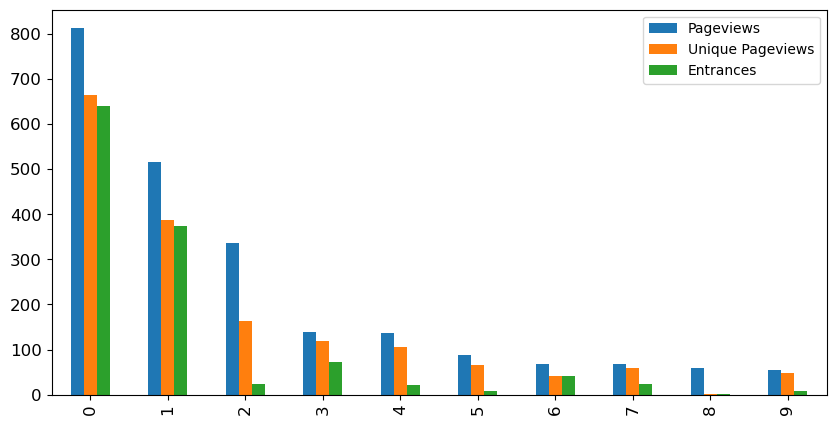

In [172]:
#Visualize page data using a bar chart, sort the chart by pageviews
ga_page_data[:10].sort_values(by='Pageviews', ascending=False).plot.bar(figsize=(10,5),fontsize=12)

<AxesSubplot:>

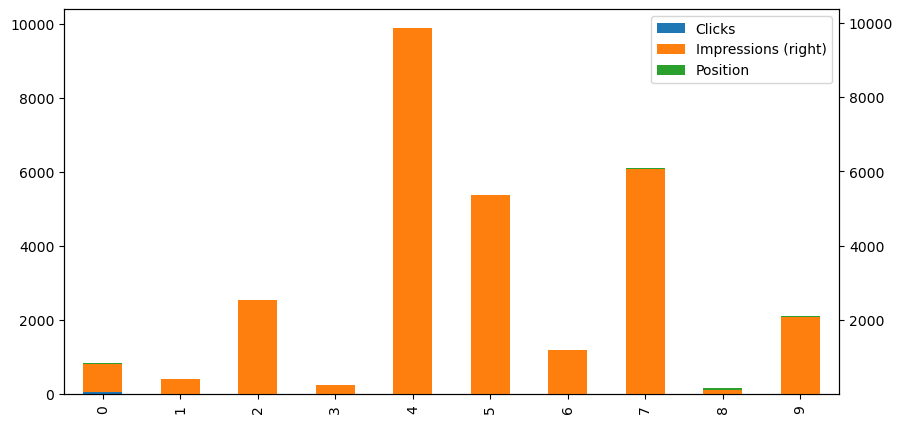

In [173]:
#Plot another bar char, five it a secondary y axis as Impressions and stack the bar chart
gsc_query[:10].plot.bar(figsize=(10,5), secondary_y="Impressions", stacked=True)

<AxesSubplot:>

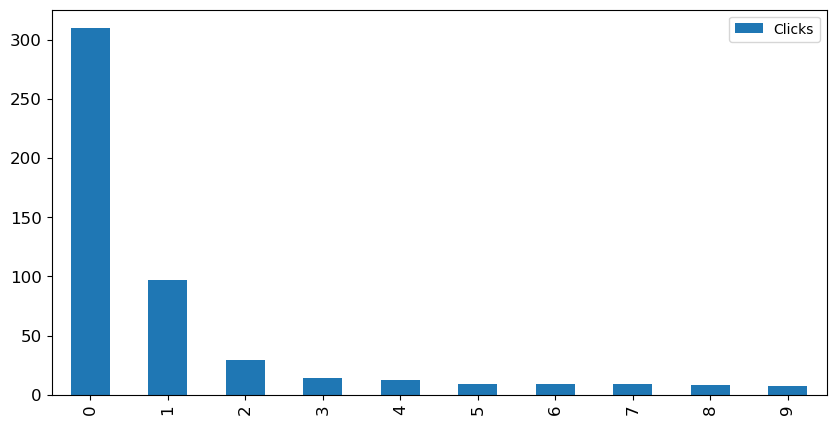

In [174]:
#Plot another bar chart, give it a secondary y axes as Impressions and stack the bar chart
gsc_country[['Country','Clicks']][:10].plot.bar(figsize=(10,5), fontsize=12)

### Visualizing Adwords PPC data

<AxesSubplot:>

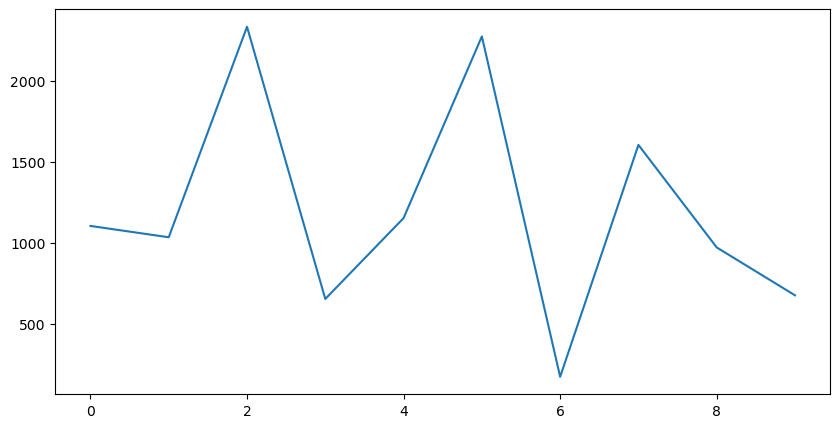

In [175]:
ppc_data['Cost'][:10].plot(kind='line', figsize=(10,5))

### Visualizaing Facebook Ads Data

In [176]:
fb_data.head()

,Unnamed: 0,Reporting starts,Reporting ends,Campaign name,Delivery,Mobile app installs,Mobile app actions,Cost per mobile app install (GBP),Cost per mobile app action (GBP),Desktop app installs,Desktop app engagement,Cost per desktop app install (GBP),Cost per desktop app engagement (GBP),Post reactions,Post comments,Post shares
0,0,2014-02-21,2018-01-29,Campaign1,0,11451.0,NaN,1.275683,NaN,NaN,NaN,NaN,NaN,1807.0,42.0,133.0
1,1,2015-12-04,2015-12-04,Campaign2,inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,2,2015-10-21,2015-10-21,Campaign3,inactive,2.0,NaN,3.530000,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
3,3,2015-10-20,2015-10-20,Campaign3,inactive,2.0,NaN,16.500000,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN
4,4,2015-10-20,2015-10-20,Campaign4,inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Mobile app installs', ylabel='Cost per mobile app install (GBP)'>

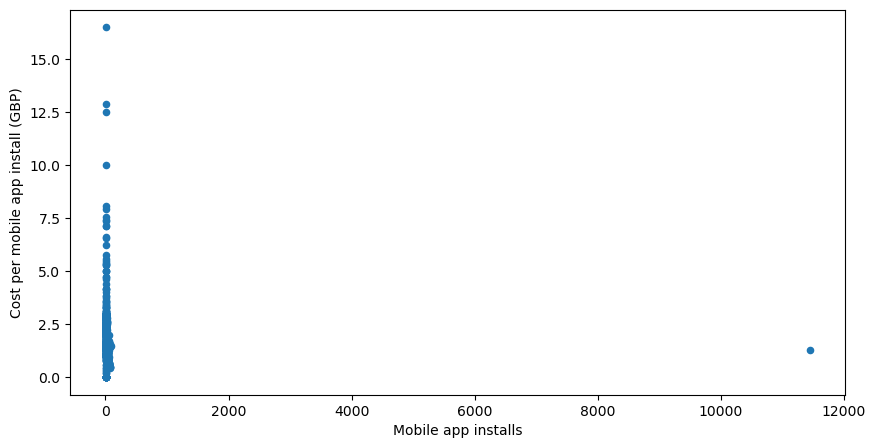

In [177]:
#Scatter charts are used to look for relationship patterns, create on between two metrics

fb_data.plot.scatter(x='Mobile app installs',
                    y='Cost per mobile app install (GBP)', figsize=(10,5))

<AxesSubplot:xlabel='Mobile app installs', ylabel='Cost per mobile app install (GBP)'>

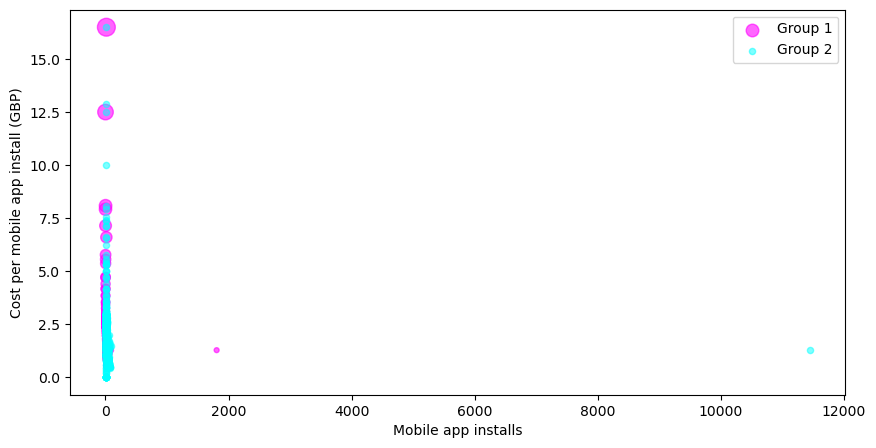

In [178]:
# Plot two scatter graphs on top of eachother and format it
ax=fb_data.plot.scatter(x='Post reactions', y='Cost per mobile app install (GBP)',
                       color='Magenta', label='Group 1',
                       alpha=.6, s=fb_data['Cost per mobile app install (GBP)']*10,
                       figsize=(10,5))
fb_data.plot.scatter(x='Mobile app installs', y='Cost per mobile app install (GBP)',
                    color='Cyan',
                    label='Group 2', ax=ax, alpha=.5,
                    figsize=(10,5))

### Visualizing Google Trends Data

<AxesSubplot:xlabel='date'>

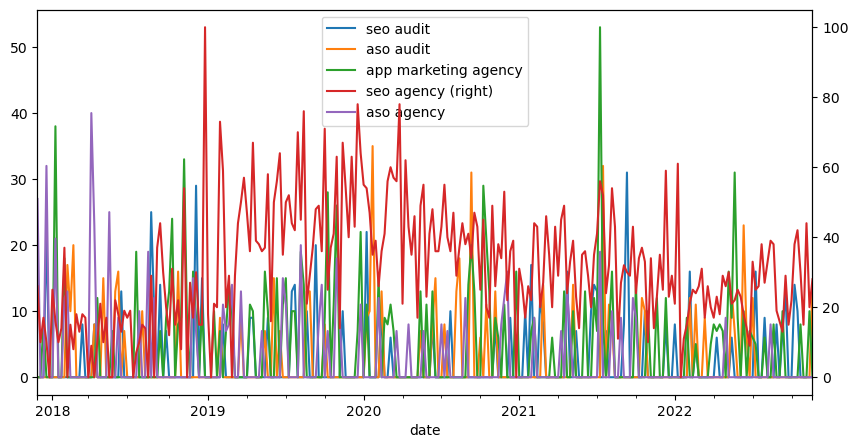

In [179]:
#Plot a line graph with a secondary y of the largest value
trends_data.plot(secondary_y=('seo agency'), figsize=(10,5))

<AxesSubplot:xlabel='date'>

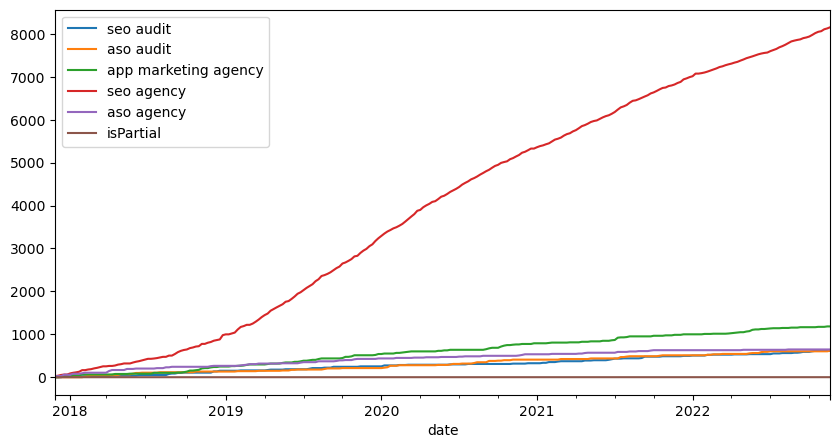

In [180]:
#Ploting a chart of the cummulative sum of all the data
trends_data.cumsum().plot(figsize=(10,5))

In [181]:
import pandas as pd

In [182]:
#Import Google Analytics Pages data
ga_page_data=pd.read_csv('data/ga_data/ga_pages.csv', skiprows=6, nrows=376)

In [183]:
#Importing Pages data from Google Search Console
gsc_page = pd.read_csv('data/gsc_data/gsc_pages.csv')

In [184]:
#Import Facebook ad data
fb_data = pd.read_csv('data/other_data/facebook-data-ads.csv',
                     parse_dates=['Reporting starts', 'Reporting ends'])

### Fix Google Analytics Page Data

We know that some of the data being gatehred in GA is wrong. GA has been gathering homepage data under two pages, these pages are / and /www.miratric.co.uk. Also during this process we will want to create a URL that can be gathered from Google Search Console

In [185]:
#Look at Google Analytics data
ga_page_data.head()

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
0,/,813,665,00:02:05,641,14.35%,55.97%,£0.00
1,/www.miratrix.co.uk,515,388,00:02:17,373,59.25%,56.89%,£0.00
2,/get-in-touch/,336,163,00:01:06,23,10.53%,33.04%,£0.00
3,/app-marketing-agency/,140,120,00:02:04,73,18.31%,57.86%,£0.00
4,/app-store-optimization-services/,136,105,00:01:30,22,14.29%,47.79%,£0.00


### Recreate Google Analytics Page URL

In [186]:
#Split the URL by /
split_dom = ga_page_data.Page.str.rpartition("/")

In [187]:
split_dom.head()

,0,1,2
0,,/,
1,,/,www.miratrix.co.uk
2,/get-in-touch,/,
3,/app-marketing-agency,/,
4,/app-store-optimization-services,/,


In [188]:
split_dom[2].replace("", "miratrix.co.uk", inplace=True)

In [189]:
#Change URL format so that it matched other data sources
split_dom[2].replace("www.miratrix.co.uk", "miratrix.co.uk", inplace=True)

In [190]:
split_dom.head()

,0,1,2
0,,/,miratrix.co.uk
1,,/,miratrix.co.uk
2,/get-in-touch,/,miratrix.co.uk
3,/app-marketing-agency,/,miratrix.co.uk
4,/app-store-optimization-services,/,miratrix.co.uk


In [191]:
#Build the URL and replace current URL's with new URL format
ga_page_data.Page = "https://"+split_dom[2]+split_dom[0]+"/"

In [192]:
ga_page_data.head()

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
0,https://miratrix.co.uk/,813,665,00:02:05,641,14.35%,55.97%,£0.00
1,https://miratrix.co.uk/,515,388,00:02:17,373,59.25%,56.89%,£0.00
2,https://miratrix.co.uk/get-in-touch/,336,163,00:01:06,23,10.53%,33.04%,£0.00
3,https://miratrix.co.uk/app-marketing-agency/,140,120,00:02:04,73,18.31%,57.86%,£0.00
4,https://miratrix.co.uk/app-store-optimization-...,136,105,00:01:30,22,14.29%,47.79%,£0.00


### Grouping Data

In order to fix the issue of having two homepage URLs (and possibly more) we will need to group the data by Page. This poses some issues as not all the data are numerical and we are also dealing with a timeseries.

What can be done is to change the object fields to numerical and to convert the time on page column to a timedelta.

In [193]:
ga_page_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Page               376 non-null    object
 1   Pageviews          376 non-null    int64 
 2   Unique Pageviews   376 non-null    int64 
 3   Avg. Time on Page  376 non-null    object
 4   Entrances          376 non-null    int64 
 5   Bounce Rate        376 non-null    object
 6   % Exit             376 non-null    object
 7   Page Value         376 non-null    object
dtypes: int64(3), object(5)
memory usage: 23.6+ KB


### Wrangling Data Types Gor Groupby Function

In [194]:
#Replace 0 with time format 00:00:00
ga_page_data['Avg. Time on Page'] = ga_page_data['Avg. Time on Page'].replace(0, '00:00:00')

In [195]:
#Convert column from string to time delta
ga_page_data['Avg. Time on Page'] = pd.to_timedelta(ga_page_data['Avg. Time on Page'])

In [196]:
#Replace % with nothing
ga_page_data['Bounce Rate'] = ga_page_data['Bounce Rate'].astype(str).str.replace('%',"")

In [197]:
#Convert the column into a Float
ga_page_data['Bounce Rate'] = ga_page_data['Bounce Rate'].astype('float')

In [198]:
#Replace % with nothing
ga_page_data['% Exit'] = ga_page_data['% Exit'].astype(str).str.replace('%',"")
#Convert the cilmn into a Float
ga_page_data['% Exit'] = ga_page_data['% Exit'].astype('float')

In [199]:
#Replace % with nothing
ga_page_data['Page Value'] = ga_page_data['Page Value'].astype(str).str.replace('£',"")
#Convert the cilmn into a Float
ga_page_data['Page Value'] = ga_page_data['Page Value'].astype('float')

In [200]:
#Set the index for the dataframe to Page
ga_page_data.set_index('Page', inplace=True)

In [201]:
#Check the data to make sure the data types have changed
ga_page_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376 entries, https://miratrix.co.uk/ to https://www.miratrix.co.uk#utm_source=nav&utm_medium=traffic&utm_campaign=datatools/
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Pageviews          376 non-null    int64          
 1   Unique Pageviews   376 non-null    int64          
 2   Avg. Time on Page  376 non-null    timedelta64[ns]
 3   Entrances          376 non-null    int64          
 4   Bounce Rate        376 non-null    float64        
 5   % Exit             376 non-null    float64        
 6   Page Value         376 non-null    float64        
dtypes: float64(3), int64(3), timedelta64[ns](1)
memory usage: 23.5+ KB


### Applying Groupby To The Data

In [202]:
#Groupby index and get the mean of the 'Avg. Time on Page'
avg_time = ga_page_data.groupby(ga_page_data.index)['Avg. Time on Page'].mean(numeric_only=False)

In [203]:
#Convert avg_time to dataframe and store as ga_time
ga_time = pd.DataFrame(avg_time)

In [204]:
#Groupby Bounce, Exit, Pageviews and Unique Pageviews using the appropriate math and store in a dataframe. Save as ga_bou_ex_type

ga_bou_ex_type = pd.DataFrame(ga_page_data.groupby(ga_page_data.index).agg({
    'Bounce Rate': ['mean'], "% Exit": ['mean'], 'Pageviews': sum, 'Unique Pageviews':sum}))



In [205]:
#Check your time groupby
ga_time.head()

,Avg. Time on Page
Page,
https://#utm_source=nav&utm_medium=traffic&utm_campaign=datatools/,0 days 00:00:19
https://#utm_source=nav&utm_medium=traffic&utm_campaign=datatools/app-marketing-agency/,0 days 00:00:04
https://+&cd=10&hl=en&ct=clnk&gl=in/search?q=cache:bI4Yk20ZHV8J:https://miratrix.co.uk/get-in-touch/,0 days 00:00:00
https://+&cd=5&hl=en&ct=clnk&gl=uk/search?q=cache:CAP7TiQpKL4J:https://miratrix.co.uk/tag/bridgnorth-shoplifters/,0 days 00:00:00
https://39/blog/page/,0 days 00:00:00


In [206]:
#Check your aggregated groupby
ga_bou_ex_type.head()

,Bounce Rate,% Exit,Pageviews,Unique Pageviews
,mean,mean,sum,sum
Page,,,,
https://#utm_source=nav&utm_medium=traffic&utm_campaign=datatools/,0.0,50.0,2,2
https://#utm_source=nav&utm_medium=traffic&utm_campaign=datatools/app-marketing-agency/,0.0,50.0,2,2
https://+&cd=10&hl=en&ct=clnk&gl=in/search?q=cache:bI4Yk20ZHV8J:https://miratrix.co.uk/get-in-touch/,0.0,100.0,1,1
https://+&cd=5&hl=en&ct=clnk&gl=uk/search?q=cache:CAP7TiQpKL4J:https://miratrix.co.uk/tag/bridgnorth-shoplifters/,100.0,100.0,1,1
https://39/blog/page/,0.0,100.0,1,1


### Rebuilding The Google Analytics Dataframe 

Here we will rebuild GA dataset for later use

In [207]:
# Merge ga_time and ga_bou_ex_type on page and with an inner join
new_ga = pd.merge(ga_time, #left dataset
                 ga_bou_ex_type, #right dataset
                 how='inner', #we're joining using the data in the column
                 left_on="Page", #the left dataset is being joined on the column Page
                 right_on="Page" #the right dataset is being joined on the column Page
                 ).sort_values(by="Avg. Time on Page", ascending=False) #sort the new dataframe

In [208]:
new_ga.head()

,Avg. Time on Page,"(Bounce Rate, mean)","(% Exit, mean)","(Pageviews, sum)","(Unique Pageviews, sum)"
Page,,,,,
https://channels/channel/UCAQfRNzXGD4BQICkO1KQZUA/,0 days 00:21:45,0.0,0.0,1,1
https://miratrix.co.uk/top-3-competitor-analysis-for-aso/,0 days 00:18:09.500000,50.0,87.5,5,5
https://www.miratrix.co.uk?SuperSocializerAuth=LiveJournal/blog/page/30/,0 days 00:14:57,0.0,0.0,1,1
https://about/channel/UCAQfRNzXGD4BQICkO1KQZUA/,0 days 00:14:45,0.0,0.0,2,2
https://videos?view=0&sort=p&flow=grid/channel/UCAQfRNzXGD4BQICkO1KQZUA/,0 days 00:14:43,0.0,0.0,1,1


In [209]:
#rename (Bounce Rate, mean), (%Exit, mean), (Pageviews, sum), (Unique Pageviews, sum)
new_ga = new_ga.rename(columns={('Bounce Rate', 'mean'):'Bounce Rate', ('% Exit', 'mean'):'Exit',
                                                                        ('Pageviews', 'sum'):'Pageviews''',
                                                                        ('Unique Pageviews', 'sum'):'Unique Pageviews'})

In [210]:
# Check the renameing
new_ga.head()

,Avg. Time on Page,Bounce Rate,Exit,Pageviews,Unique Pageviews
Page,,,,,
https://channels/channel/UCAQfRNzXGD4BQICkO1KQZUA/,0 days 00:21:45,0.0,0.0,1,1
https://miratrix.co.uk/top-3-competitor-analysis-for-aso/,0 days 00:18:09.500000,50.0,87.5,5,5
https://www.miratrix.co.uk?SuperSocializerAuth=LiveJournal/blog/page/30/,0 days 00:14:57,0.0,0.0,1,1
https://about/channel/UCAQfRNzXGD4BQICkO1KQZUA/,0 days 00:14:45,0.0,0.0,2,2
https://videos?view=0&sort=p&flow=grid/channel/UCAQfRNzXGD4BQICkO1KQZUA/,0 days 00:14:43,0.0,0.0,1,1


### Dropping Columns

Sometimes we end up with data that we don't need that we want to drop out of our dataframe. In this section, we will drop columns from GA and Facebook ads data.

In [211]:
#Check the Google Analytics Page data
ga_page_traffic_data.head()

,Day Index,Pageviews,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2018-08-31,14,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-01,6,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-02,17,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-03,14,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-09-04,11,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
#Drop NaN values from the dataset
ga_page_traffic_data.dropna(axis=1, how='all', inplace=True)

In [213]:
#Check to see if the drop na worked
ga_page_traffic_data.head()

,Day Index,Pageviews
0,2018-08-31,14
1,2018-09-01,6
2,2018-09-02,17
3,2018-09-03,14
4,2018-09-04,11


In [214]:
#Check the Facebook Ads data
fb_data.head()

,Unnamed: 0,Reporting starts,Reporting ends,Campaign name,Delivery,Mobile app installs,Mobile app actions,Cost per mobile app install (GBP),Cost per mobile app action (GBP),Desktop app installs,Desktop app engagement,Cost per desktop app install (GBP),Cost per desktop app engagement (GBP),Post reactions,Post comments,Post shares
0,0,2014-02-21,2018-01-29,Campaign1,0,11451.0,NaN,1.275683,NaN,NaN,NaN,NaN,NaN,1807.0,42.0,133.0
1,1,2015-12-04,2015-12-04,Campaign2,inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,2,2015-10-21,2015-10-21,Campaign3,inactive,2.0,NaN,3.530000,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
3,3,2015-10-20,2015-10-20,Campaign3,inactive,2.0,NaN,16.500000,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN
4,4,2015-10-20,2015-10-20,Campaign4,inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
#Drop all columns that have NaN
fb_data.drop('Unnamed: 0', axis=1, inplace=True)

In [216]:
#Check if the drop worked
fb_data.head()

,Reporting starts,Reporting ends,Campaign name,Delivery,Mobile app installs,Mobile app actions,Cost per mobile app install (GBP),Cost per mobile app action (GBP),Desktop app installs,Desktop app engagement,Cost per desktop app install (GBP),Cost per desktop app engagement (GBP),Post reactions,Post comments,Post shares
0,2014-02-21,2018-01-29,Campaign1,0,11451.0,NaN,1.275683,NaN,NaN,NaN,NaN,NaN,1807.0,42.0,133.0
1,2015-12-04,2015-12-04,Campaign2,inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,2015-10-21,2015-10-21,Campaign3,inactive,2.0,NaN,3.530000,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
3,2015-10-20,2015-10-20,Campaign3,inactive,2.0,NaN,16.500000,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN
4,2015-10-20,2015-10-20,Campaign4,inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Replace Missing NaN Facebook Ad Data

We can see from the Facebook Ad data that there are a lot of NaN (Not A Number) values, these are missing data. In order to visualize this data we will need to replace this data with a number. In this case we will use 0.

In [217]:
#Use fillna to replace na values with 0
fb_data.fillna(0,inplace=True)

In [218]:
#Check that fillna worked
fb_data.head()

,Reporting starts,Reporting ends,Campaign name,Delivery,Mobile app installs,Mobile app actions,Cost per mobile app install (GBP),Cost per mobile app action (GBP),Desktop app installs,Desktop app engagement,Cost per desktop app install (GBP),Cost per desktop app engagement (GBP),Post reactions,Post comments,Post shares
0,2014-02-21,2018-01-29,Campaign1,0,11451.0,0.0,1.275683,0.0,0.0,0.0,0.0,0.0,1807.0,42.0,133.0
1,2015-12-04,2015-12-04,Campaign2,inactive,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2,2015-10-21,2015-10-21,Campaign3,inactive,2.0,0.0,3.530000,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,2015-10-20,2015-10-20,Campaign3,inactive,2.0,0.0,16.500000,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0
4,2015-10-20,2015-10-20,Campaign4,inactive,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Joining GA And Google Search Console Data

In order to extract more value from our datasets we can join them together so we can view the trends all in one place. Pandas has various methods for joining data in this case we will use pd.merge

In [219]:
# Use pandas merge to joine Google Console and Google Analytics data
ga_gsc_data = pd.merge(gsc_page, #left data
                      new_ga, #right data
                      how='inner',
                      left_on="Page",
                      right_index=True)

In [220]:
#Check to see if it worked
ga_gsc_data.head()

,Page,Clicks,Impressions,CTR,Position,Avg. Time on Page,Bounce Rate,Exit,Pageviews,Unique Pageviews
0,https://miratrix.co.uk/,371,100673,0.37%,42.59,0 days 00:01:43.666666666,47.296667,54.286667,1396,1095
1,https://miratrix.co.uk/app-marketing-agency/,80,30824,0.26%,26.84,0 days 00:01:45.333333333,64.436667,60.913333,210,181
2,https://miratrix.co.uk/mobile-app-competitor-a...,16,1458,1.1%,30.64,0 days 00:04:06,53.335000,89.475000,30,26
3,https://miratrix.co.uk/blippar-the-message-isn...,11,517,2.13%,36.05,0 days 00:00:22.333333333,58.170000,78.333333,27,21
4,https://miratrix.co.uk/author/nduddy/,10,140,7.14%,5.61,0 days 00:02:52,22.223333,38.890000,15,13


### Saving Our Data To A CSV

In [221]:
#Save the newly created Page dataset
ga_gsc_data.to_csv('data/other_data/ga_gsc_data.csv')

In [222]:
#Save the amended facebook dataset
fb_data.to_csv('data/other_data/fixed_fb_data.csv')

### Customizing Visualizations

In [223]:
import pandas as pd # importing the pandas library
import matplotlib.pyplot as plt #importing matplotlib library
import seaborn as sns #import seaborn package
%matplotlib inline

import warnings #for managing error message
warnings.filterwarnings('ignore')

### Importing And Exploring Data

In [224]:
ga_gsc_data = pd.read_csv('data/other_data/ga_gsc_data.csv',
                         usecols=['Page','Clicks','Impressions','CTR','Position','Avg. Time on Page', 
                                  'Bounce Rate', 'Exit', 'Pageviews', 'Unique Pageviews'])



In [225]:
#View the make up of the data using .info()
ga_gsc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Page               193 non-null    object 
 1   Clicks             193 non-null    int64  
 2   Impressions        193 non-null    int64  
 3   CTR                193 non-null    object 
 4   Position           193 non-null    float64
 5   Avg. Time on Page  193 non-null    object 
 6   Bounce Rate        193 non-null    float64
 7   Exit               193 non-null    float64
 8   Pageviews          193 non-null    int64  
 9   Unique Pageviews   193 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 15.2+ KB


In [226]:
#Have a look at the data
ga_gsc_data.head()

,Page,Clicks,Impressions,CTR,Position,Avg. Time on Page,Bounce Rate,Exit,Pageviews,Unique Pageviews
0,https://miratrix.co.uk/,371,100673,0.37%,42.59,0 days 00:01:43.666666666,47.296667,54.286667,1396,1095
1,https://miratrix.co.uk/app-marketing-agency/,80,30824,0.26%,26.84,0 days 00:01:45.333333333,64.436667,60.913333,210,181
2,https://miratrix.co.uk/mobile-app-competitor-a...,16,1458,1.1%,30.64,0 days 00:04:06,53.335000,89.475000,30,26
3,https://miratrix.co.uk/blippar-the-message-isn...,11,517,2.13%,36.05,0 days 00:00:22.333333333,58.170000,78.333333,27,21
4,https://miratrix.co.uk/author/nduddy/,10,140,7.14%,5.61,0 days 00:02:52,22.223333,38.890000,15,13


In [227]:
#Set the Page column as the index to see what pages are performing and which are not
ga_gsc_data.set_index('Page', inplace=True)

### Prepare Data For Visualization

We can see from the info table above that we have some series which should be numerical or time but are instead objects. Before visualizing we must transform this data into the correct data type.

In [228]:
#Remove the % sign by using string replace
ga_gsc_data.CTR = ga_gsc_data.CTR.str.replace('%','')

In [229]:
#Repalce 0 days with nothing and convert the remaining string to a timedelta
ga_gsc_data['Avg. Time on Page'] = ga_gsc_data['Avg. Time on Page'].str.replace('0 days','').apply(pd.Timedelta)

### Plot A Basic Visualization

<AxesSubplot:>

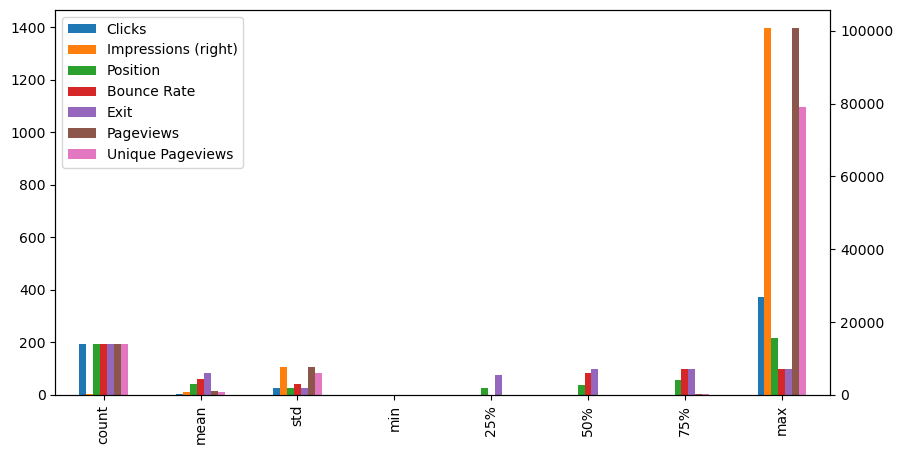

In [230]:
#Plot a basic bar chart showing the statistical breakdown in the data set
#Passing secondary y axis because Impressions will dwarf every other number
ga_gsc_data.describe().plot.bar(figsize=(10,5), secondary_y='Impressions')

<AxesSubplot:xlabel='Page'>

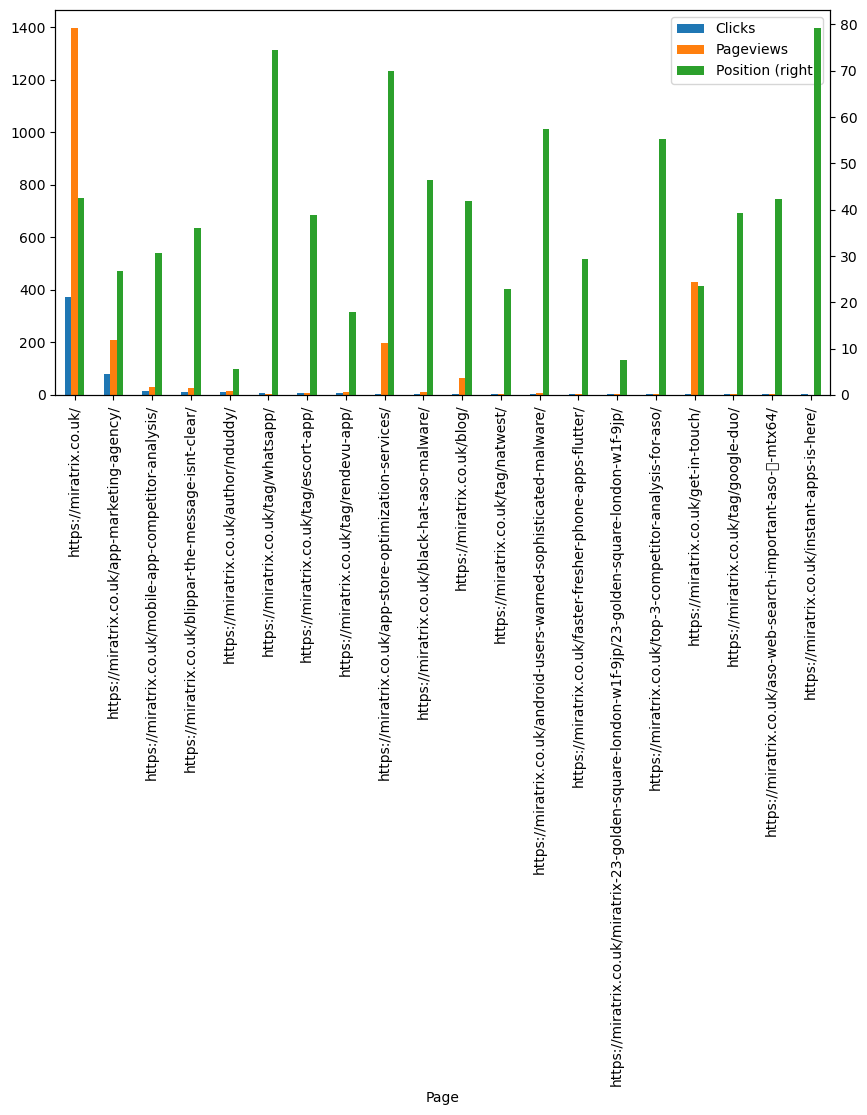

In [231]:
#Left y axis  = clicks and pageviews
#Right y axis = Position (see key in grapg (Position(right))

ga_gsc_data[['Clicks', 'Pageviews', 'Position']][:20].plot.bar(figsize=(10,5),
                                                             secondary_y=('Position'))

### Customizing Plots With Matplotlib

Matplotlib is the underlying plotting library for Pandas. Many of the more recent tools created for visualizing data are built on top of matplotlib, including Seaborn a popular library that we'll investigate later in this notebook. In this section we'll use functions from matplotlib to customize charts for presentations.

### Creating Matplotlib Subplots

Subplots are a commmon method for drawing two plots either side by side as an overlay.

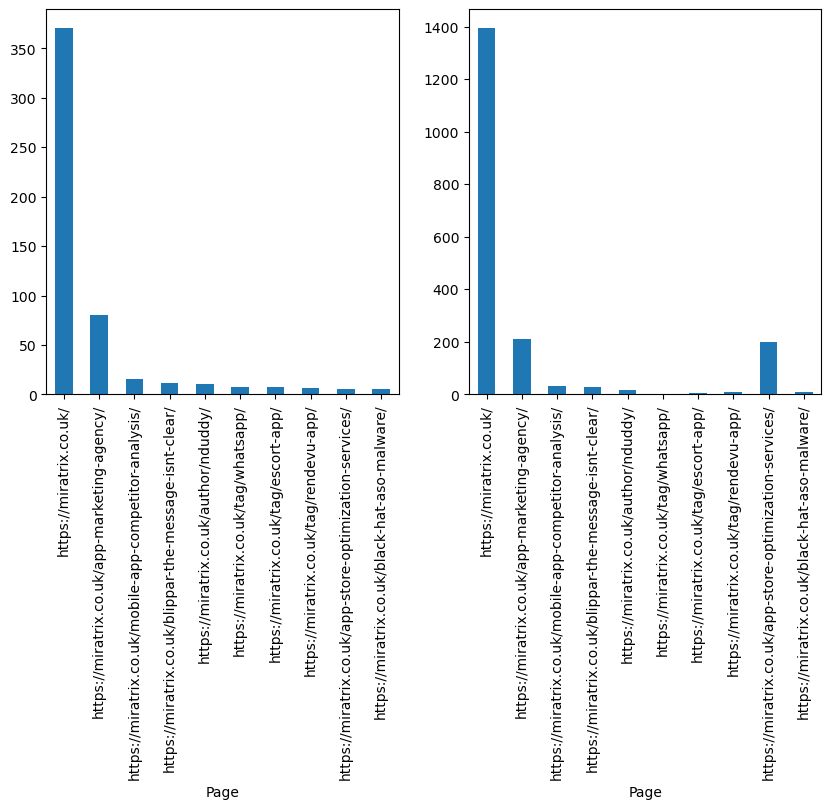

In [232]:
#Create subplots of two Series of data from ga_gsc_data
fig = plt.figure(figsize=(10,5)) #Create matplotlib figure

ax = fig.add_subplot(121) #Create matplotlib axes (nrows, ncolumns, position) so 121 = 1 ROW, 1 COLUMN, POSITION 1
ax2 = fig.add_subplot(122) #Create another axes where 1 ROW, 2 COLUMNS, in POSITION 2

#First plot
ga_gsc_data['Clicks'][:10].plot.bar(ax=ax) #set the matplotlib axes to ax - referencing ax=ax 
                                            #"Should I look for a matplotlib axes? and if I am tell what is, 
                                            #if not, none" so if you don't pass ax=ax it will assume there's no 
                                            #functionality to look for

#Second plot
ga_gsc_data['Pageviews'][:10].plot.bar(ax=ax2) #set the matplotlib axes to ax2

plt.show() #display the charts

### Plotting Two Y-Axes Using Subplot

Plotting a secondary y axes will allow us to better understand the relationship between two datasets of varying sizes.  

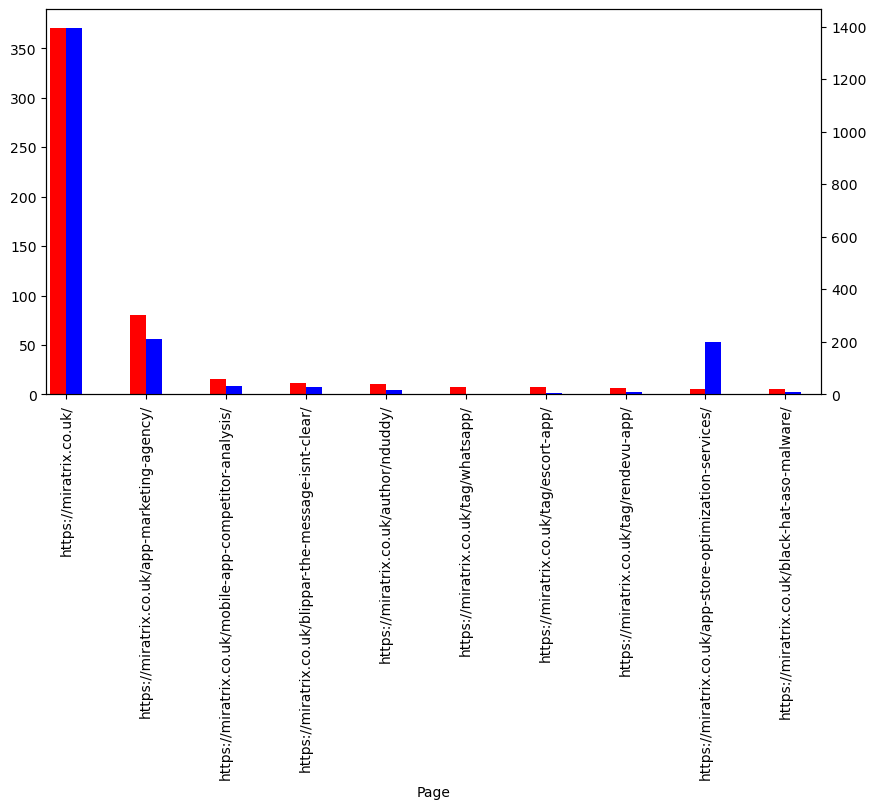

In [233]:
fig = plt.figure(figsize=(10,5)) #create matplotlib figure

#create two subplots (ax, ax2)
ax = fig.add_subplot(111) #create matplotlib axes
ax2 = ax.twinx() #create another axes that shares the same x axis as ax, Twinx is how we fit the secondary y axes

width = 0.2 #the width of the bars

ga_gsc_data['Clicks'][:10].plot.bar(color='red', #color of the bar
                                   ax=ax, #what matplotlib axes to use
                                   width=width, #what matplotlib axes to use (see above 0.2)
                                   position=1) #the position of the bar relative to the others

ga_gsc_data['Pageviews'][:10].plot(kind='bar', #type of plot
                                  color = 'blue', #color of bar
                                  ax=ax2, #what matplotlib axes to use
                                  width=width, # what matplotlib axes to use (see above 0.2)
                                  position =0) #the postion sof the bar relative to the others

#display the charts
plt.show()

### Adding A And Y Labels To A Plot

We can add labels to x and y axes to ensure clarity of a report.

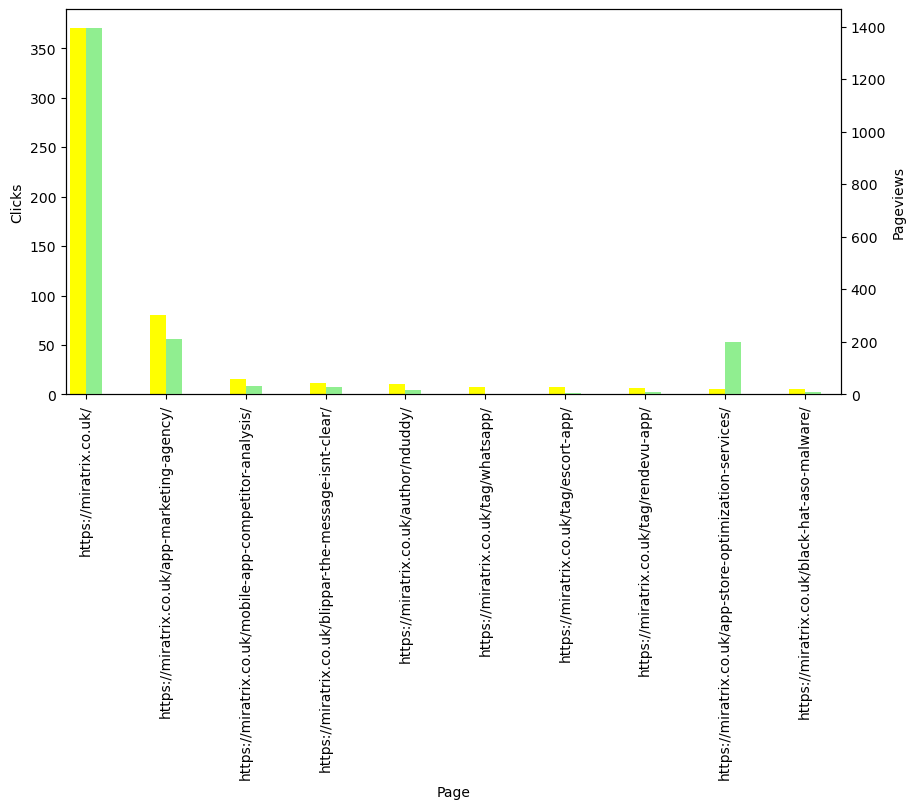

In [235]:
fig = plt.figure(figsize=(10,5)) # Create matplotlib figure, 10 wide, 5 high

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() #Create another axes that share the same x-axis as ax

width = 0.2 #set the width of the bars

ga_gsc_data['Clicks'][:10].plot.bar(#type of chart to use * Can also do.bar but here we're passing as an arguement
                               color='yellow', #color of the bar
                               ax=ax, #what matplotlib axes to use
                               width = width, #see above, 0.2
                               position = 1, #the position of the bar relative to others, so this comes first
                               fontsize = 10) #set font size

ga_gsc_data['Pageviews'][:10].plot(kind='bar',
                                  color='lightgreen',
                                  ax=ax2,
                                  width=width,
                                  position=0)

#Create ax customizations
ax.set_xlabel('Page') #Name of the x axis
ax.set_ylabel('Clicks') #Name the primary y axis

#Create ax2 customizations
ax2.set_ylabel('Pageviews') #name the secondary y axis

#display the charts
plt.show()

### Rotating Xticks Labels

We can change the postion of URL ticks to make them more readable because they're too long.

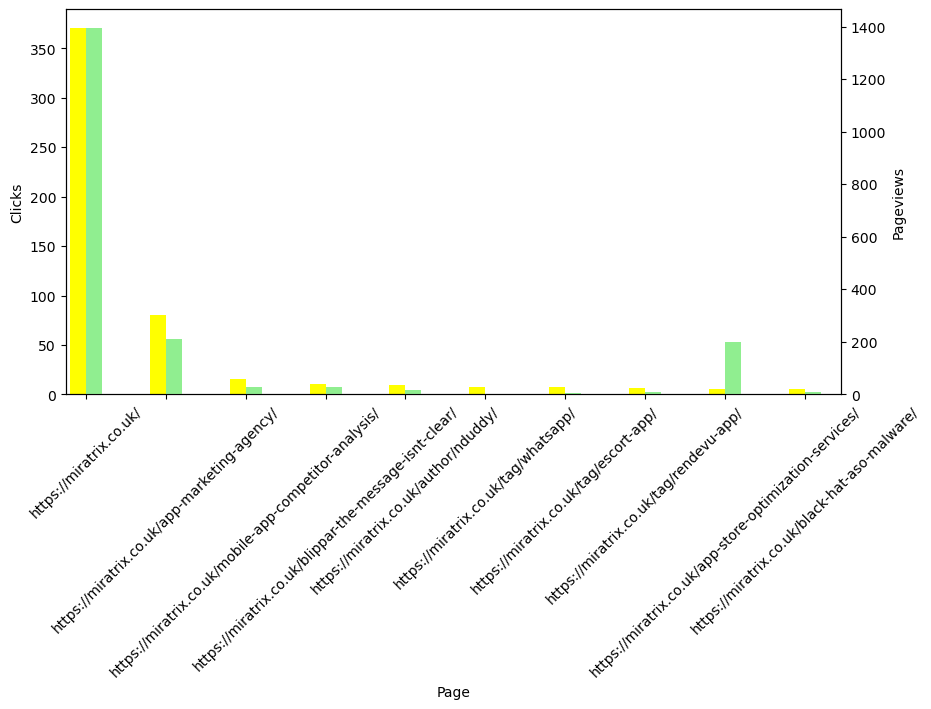

In [236]:
fig = plt.figure(figsize=(10,5)) # create matplotlib figure

ax = fig.add_subplot(111) #create matplotlib axes
ax2 = ax.twinx() #create another axes that share the same x-axis as as

width = 0.2 #set the width of the bars

ga_gsc_data['Clicks'][:10].plot.bar(color = 'yellow',#color of the bar
                                   ax=ax,#what matplotlib axes to use
                                   width=width, #set the bar width
                                   position=1, #the postion of the bar relative to the others
                                   fontsize=10) #set font size

ga_gsc_data['Pageviews'][:10].plot.bar(color = 'lightgreen',
                                      ax=ax2,
                                      width = width,
                                      position=0)

#Create ax customizations
ax.set_xlabel('Page') #name of the x axis
ax.set_ylabel('Clicks') #name the primary y axis
ax.set_xticklabels(ax.get_xticklabels(), #get a sting with the label names
                   rotation=45) #rotate the xticks labels by degrees, can make them negative too!

#Create ax2 customizations
ax2.set_ylabel('Pageviews') #name the secondary y axis

#display the charts
plt.show()

### Adding A Legend To A Plot

We can also set the legend for the figure.

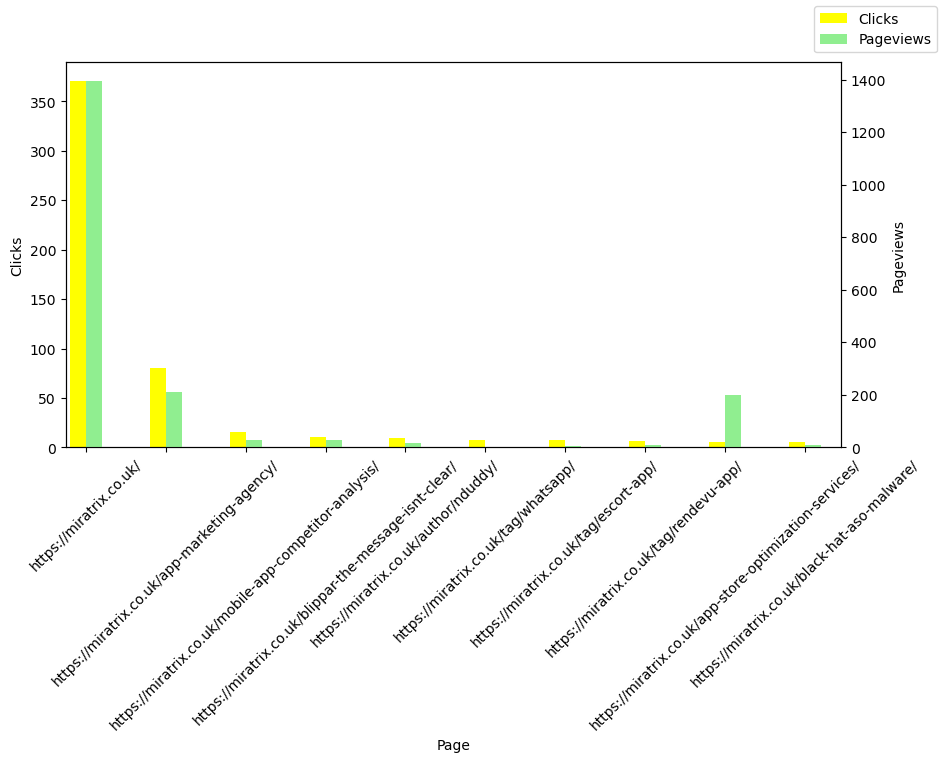

In [237]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.2

ga_gsc_data['Clicks'][:10].plot.bar(color='yellow',
                                   ax=ax,
                                   width=width,
                                    position=1,
                                    fontsize=10)

ga_gsc_data['Pageviews'][:10].plot.bar(color='lightgreen',
                                      ax=ax2,
                                      width=width,
                                      position=0)
#Create ax customizations
ax.set_xlabel('Page')
ax.set_ylabel('Clicks')
ax.set_xticklabels(ax.get_xticklabels(),
                  rotation=45)

#Create ax2 customizations
ax2.set_ylabel('Pageviews')

#Global Plot Settings
fig.legend() # set the legend  <------- HERE

#display the charts
plt.show()

### Adding Title To Our Plot

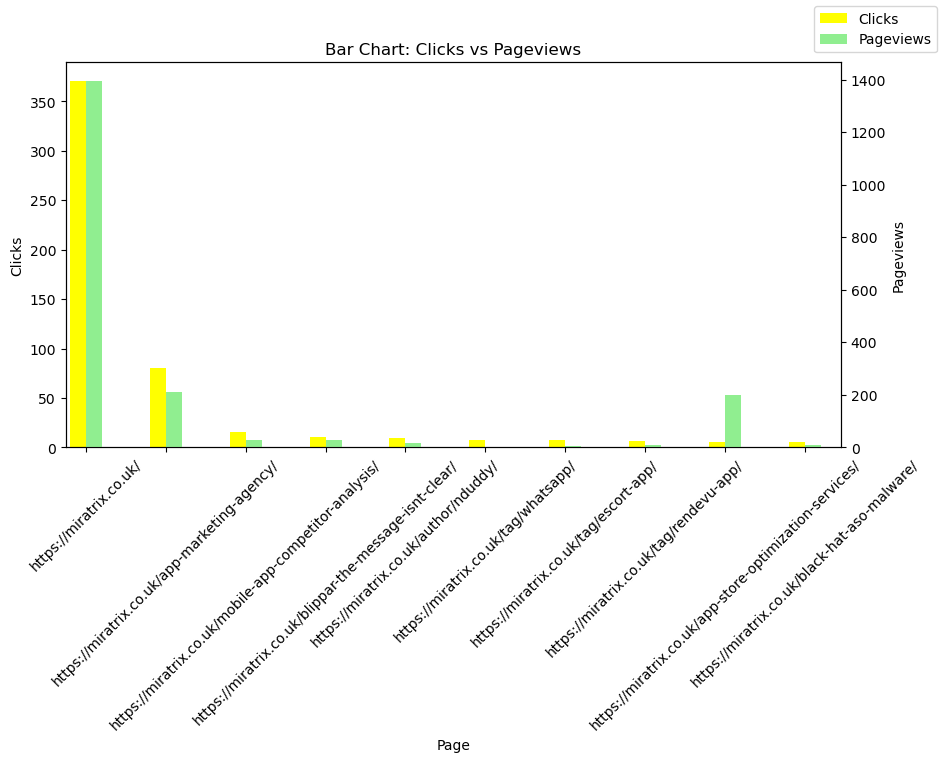

In [238]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.2

ga_gsc_data['Clicks'][:10].plot.bar(color='yellow',
                                   ax=ax,
                                   width=width,
                                    position=1,
                                    fontsize=10)

ga_gsc_data['Pageviews'][:10].plot.bar(color='lightgreen',
                                      ax=ax2,
                                      width=width,
                                      position=0)
#Create ax customizations
ax.set_xlabel('Page')
ax.set_ylabel('Clicks')
ax.set_xticklabels(ax.get_xticklabels(),
                  rotation=45)

#Create ax2 customizations
ax2.set_ylabel('Pageviews')

#Global Plot Settings
fig.legend() # set the legend  
plt.title('Bar Chart: Clicks vs Pageviews') #set the chart name <------- HERE

#display the charts
plt.show()

### Adding Annotation To A Plot

Using plot annotations allows us to be very specific about what parts of a chart viewers should pay attention to.

Text(1, 1398, 'Lots of Pageviews and Clicks')

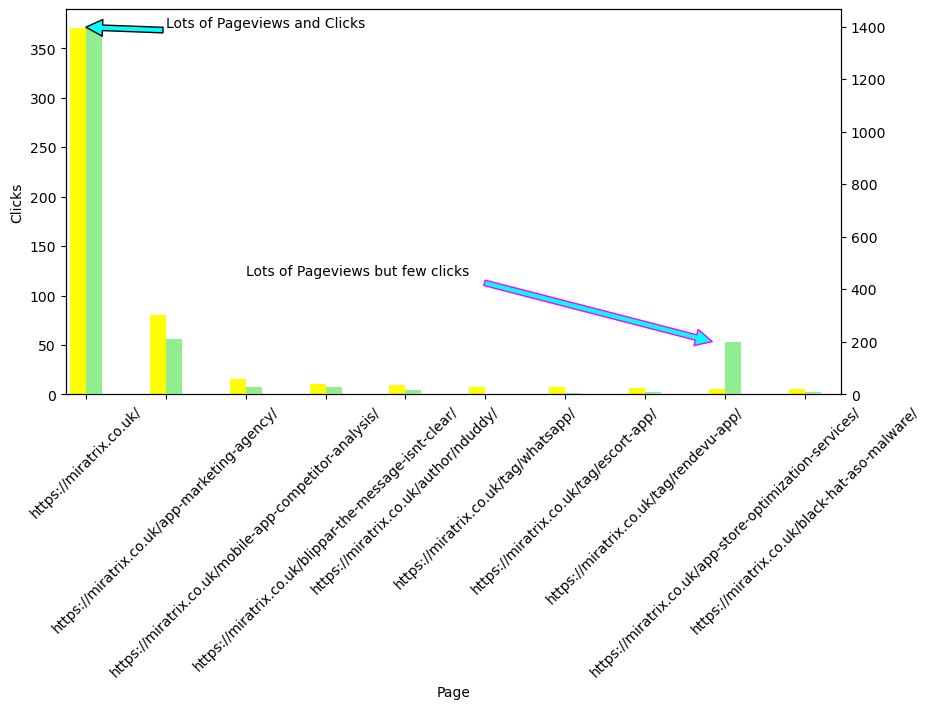

In [239]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.2

ga_gsc_data['Clicks'][:10].plot.bar(color='yellow',
                                   ax=ax,
                                   width=width,
                                    position=1,
                                    fontsize=10)

ga_gsc_data['Pageviews'][:10].plot.bar(color='lightgreen',
                                      ax=ax2,
                                      width=width,
                                      position=0)

#Create ax customizations
ax.annotate('Lots of Pageviews but few clicks',
           xy = (8,50), #where the arrow is going to go, x position 8, y position 50
            xytext=(2,120), #where the text for the arrows will show up
            arrowprops=dict(facecolor='cyan', #color
                           shrink=0.05, #length of arrow
                           lw=1, #line width
                           ec='magenta', #border color
                           zorder=1) #used to make sure annotation sits on top of bars, not bottom
           )
ax.set_xlabel('Page') #name of x axis
ax.set_ylabel('Clicks') #name of primary y axis
ax.set_xticklabels(ax.get_xticklabels(), #get a string with the label names
                  rotation=45) #rotate the xticks labels by degrees

#Create ax customizations
ax2.annotate('Lots of Pageviews and Clicks',
            xy=(0,1398),
            xytext=(1,1398),
            arrowprops=dict(facecolor='cyan', #color
                           ))

###  Switching Between Matplotlib Style Sheets

Text(1, 1398, 'Lots of Pageviews and Clicks')

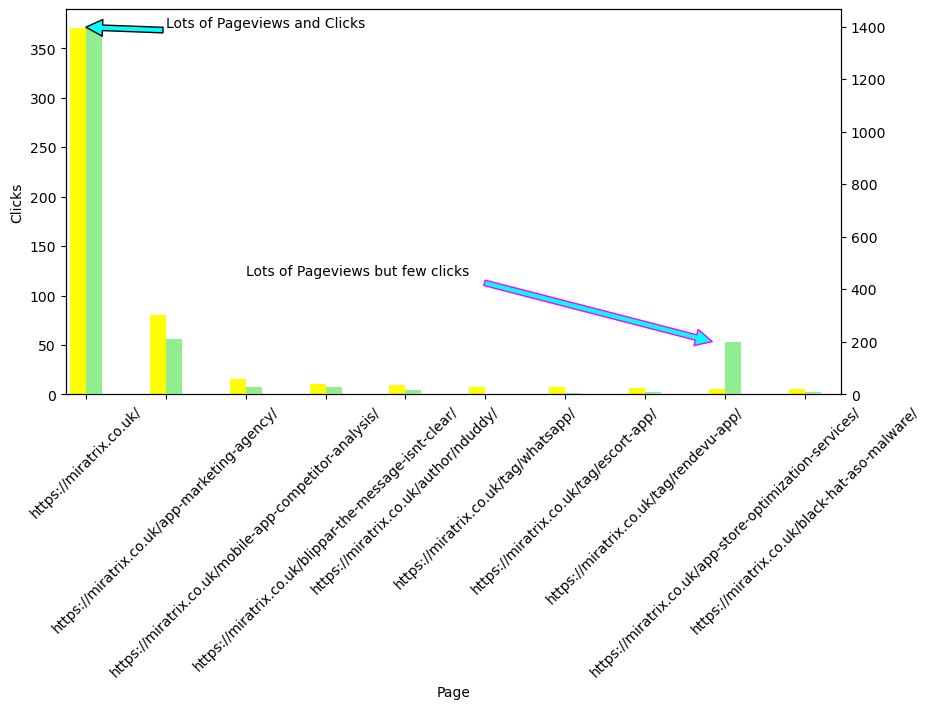

In [240]:
plt.style.use('seaborn-pastel') #set style sheet  <--- HERE

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.2

ga_gsc_data['Clicks'][:10].plot.bar(color='yellow',
                                   ax=ax,
                                   width=width,
                                    position=1,
                                    fontsize=10)

ga_gsc_data['Pageviews'][:10].plot.bar(color='lightgreen',
                                      ax=ax2,
                                      width=width,
                                      position=0)

#Create ax customizations
ax.annotate('Lots of Pageviews but few clicks',
           xy = (8,50), #where the arrow is going to go, x position 8, y position 50
            xytext=(2,120), #where the text for the arrows will show up
            arrowprops=dict(facecolor='cyan', #color
                           shrink=0.05, #length of arrow
                           lw=1, #line width
                           ec='magenta', #border color
                           zorder=1) #used to make sure annotation sits on top of bars, not bottom
           )
ax.set_xlabel('Page') #name of x axis
ax.set_ylabel('Clicks') #name of primary y axis
ax.set_xticklabels(ax.get_xticklabels(), #get a string with the label names
                  rotation=45) #rotate the xticks labels by degrees

#Create ax customizations
ax2.annotate('Lots of Pageviews and Clicks',
            xy=(0,1398),
            xytext=(1,1398),
            arrowprops=dict(facecolor='cyan', #color
                           ))

### Plotting In Seaborn

Now we will use Seaborn Plotting Package built on matplotlib to create more visually appealing charts.

### Plot A Scatter Plot In Seaborn

Here we will be plotting a scatter graph in Seaborn and customizing it with colors and sizes to make the data more readable.

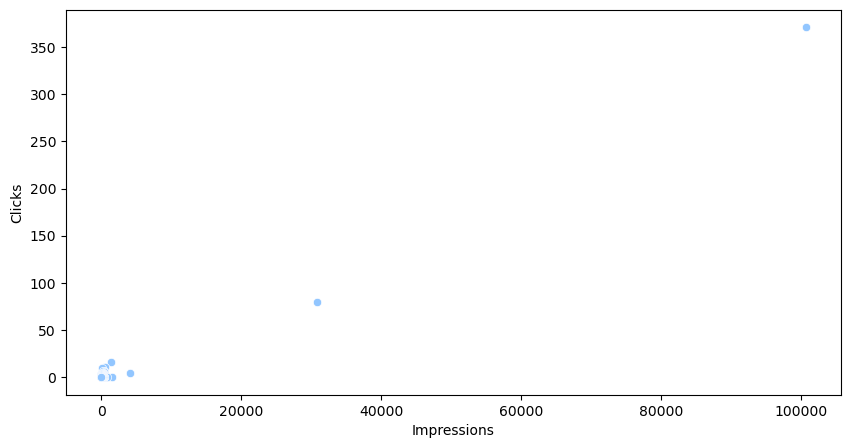

In [241]:
fig = plt.figure(figsize=(10,5)) #create matplotlib figure
ax = fig.add_subplot(111) #create matplotlib axes (rows=1 columns=1 position=1)

sns.scatterplot(x='Impressions', #x axes
               y='Clicks', #y axes
               data=ga_gsc_data) #the dataset we're using

#display the charts
plt.show()

Adding the hue arguement, allows us to apply different hues for the dots based on a numerical value in the column selected

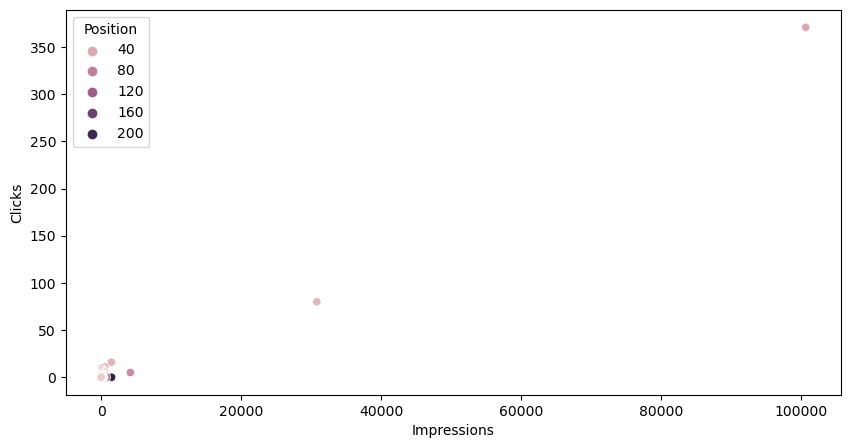

In [242]:
fig = plt.figure(figsize=(10,5)) #create matplotlib figure
ax = fig.add_subplot(111) #create matplot lib axes (rows=1, column=1, postion=1)

sns.scatterplot(x='Impressions', #x axes
               y='Clicks', #y axes
               hue='Position', # coloring the dots based on a grouped number value, (see key with different colors)
               data=ga_gsc_data) #the dataset we're using

#display the charts
plt.show()

Adding the size arguement allows us to apply a different size to the dots based on a numerical value in the column selected

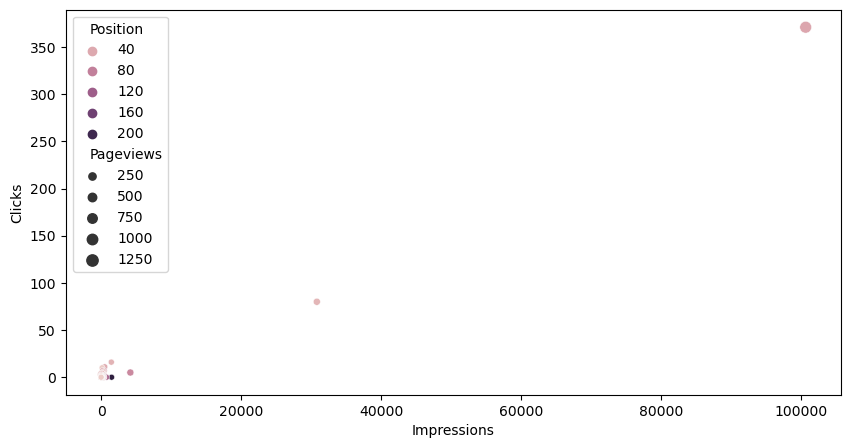

In [243]:
fig = plt.figure(figsize=(10,5)) # create matplot lib figure
ax=fig.add_subplot(111) # create matplotlin axes (rows=1, column=1, postion=1)

sns.scatterplot(x='Impressions', #x axes
               y='Clicks', #y axes
               hue='Position', #coloring the dots based on a numerical value
               size="Pageviews", #increasing the size of the dots based on Pageviews dots
               data=ga_gsc_data) # the dataset we're using

#display the charts
plt.show()

Passing a color pallete to the scatter chart which changes the colors of the plotted dots

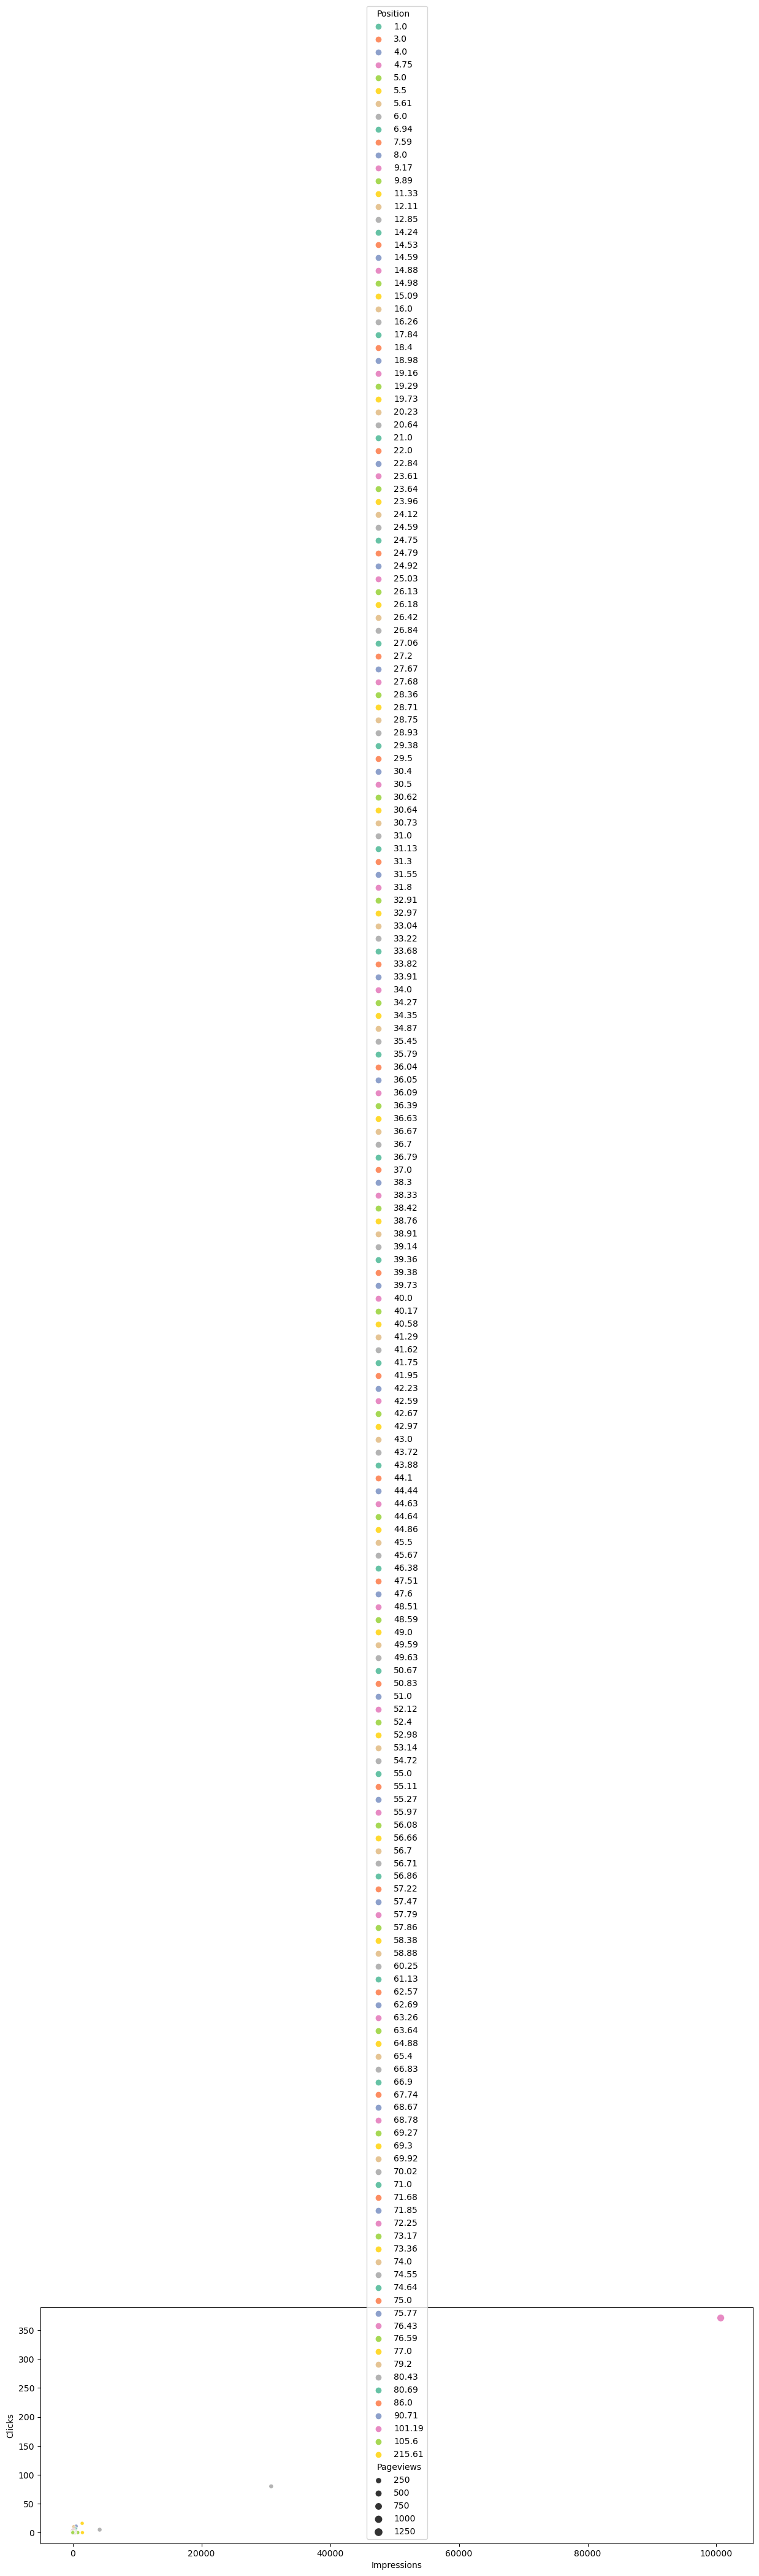

In [244]:
fig = plt.figure(figsize=(15,5)) #create matplotlib figure
ax = fig.add_subplot(111) #create matplotlib axes

sns.scatterplot(x='Impressions', #x axes
               y='Clicks', #y axes
               hue='Position', #coloring the dota based on a numerical values
                size="Pageviews", # increase the size of the dots based on Pageviews
                palette="Set2", #selecting a color palette
                data=ga_gsc_data) #the dataset we're using

#display the chart
plt.show()

### Plot A Facebook Ad Metric Heatmap In Seaborn

We can use a heatmap with correlation data to help find related features in a dataset that should be focused on. Pandas together with Seaborn makes it very easy to create correlations that we can plot in a heatmap and get answers fast.

In [246]:
# Load the facebook data fb_example_data.csv
fb_camp_data = pd.read_csv('data/other_data/fb_example_data.csv')

In [247]:
fb_camp_data.head()

,Results,Reach,Frequency,Cost per results,Budget,Amount spent (GBP),Clicks (all),CTR (all),CPC (all) (GBP),Impressions,"CPM (cost per 1,000 impressions) (GBP)",Link clicks,CPC (cost per link click) (GBP),CTR (link click-through rate),Website purchases,Website purchases conversion value,Website purchase ROAS (return on advertising spend),Button clicks
0,105,77905,1.182132,2.871238,187.2,301.48,2570,2.790627,0.117307,92094,3.273612,2126,0.141806,2.308511,105,10927.20,36.245190,482
1,77,59035,1.204590,3.910130,187.2,301.08,1846,2.595869,0.163099,71113,4.233825,1580,0.190557,2.221816,77,8525.30,28.315730,319
2,49,48718,1.254116,6.135102,187.2,300.62,1485,2.430521,0.202438,61098,4.920292,1223,0.245805,2.001702,49,5955.55,19.810891,261
3,66,66413,1.259859,3.957727,187.2,261.21,1703,2.035353,0.153382,83671,3.121870,1342,0.194642,1.603901,66,9079.10,34.757858,342
4,47,64472,1.320946,5.499787,187.2,258.49,1373,1.612184,0.188267,85164,3.035203,1099,0.235205,1.290451,47,4602.00,17.803397,257


In [248]:
#Inspect the data
fb_camp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 18 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Results                                              19 non-null     int64  
 1   Reach                                                19 non-null     int64  
 2   Frequency                                            19 non-null     float64
 3   Cost per results                                     19 non-null     float64
 4   Budget                                               19 non-null     float64
 5   Amount spent (GBP)                                   19 non-null     float64
 6   Clicks (all)                                         19 non-null     int64  
 7   CTR (all)                                            19 non-null     float64
 8   CPC (all) (GBP)                                      19 non-null     flo

In [249]:
#Create a correlation metric and store as fb_corr
fb_corr = fb_camp_data.corr()

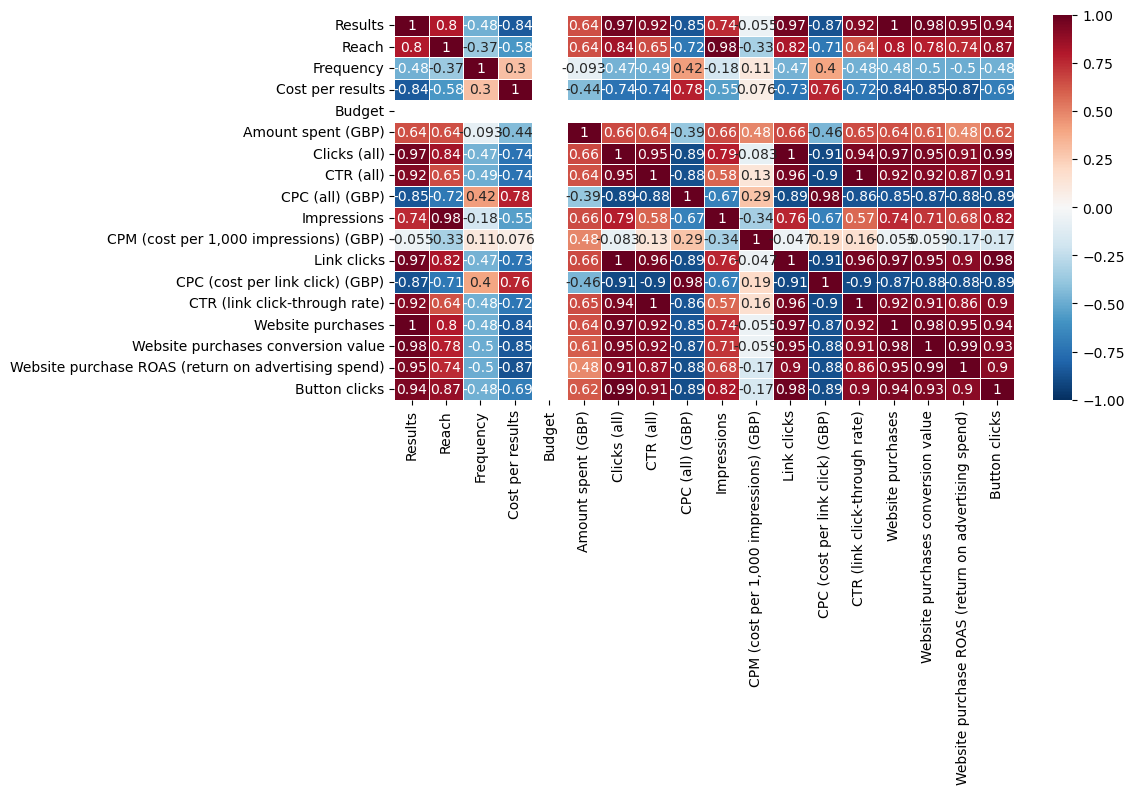

In [250]:
#Use seaborn to draw a heatmap of the correlated features in our dataset
plt.figure(figsize=(10,5))

sns.heatmap(fb_corr, #load data
           linewidth=0.5, #line width
           cmap='RdBu_r', #prefered color maps
           vmin=-1, #min range of board
           vmax=1, #max range of board
           annot=True) #add annotation

#display chart
plt.show()

### Timeseries

When sourcing timeseries data we will need to determine what time increments are best for us at the time. Pandas can help us deal with data at a microsecond level but it's not akways useful to get a sample of data in seconds increments when our business sells one high ticket priced item per week. Determine what the smallest time increment is that makes sense for the business and start from there.

In [251]:
ga_page_traffic_data = pd.read_csv('data/ga_data/ga_pages.csv',
                                  skiprows=386,
                                  nrows=366,
                                  usecols=['Day Index', 'Pageviews'],
                                  parse_dates=['Day Index'],
                                  index_col='Day Index')

In [252]:
ppc_data = pd.read_csv('data/other_data/ppc_data.csv',
                      parse_dates=['Day'],
                      index_col='Day')

### Exploring Timeseries Data

In [253]:
ga_page_traffic_data.head()

,Pageviews
Day Index,
2018-08-31,14
2018-09-01,6
2018-09-02,17
2018-09-03,14
2018-09-04,11


In [254]:
ga_page_traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2018-08-31 to 2019-08-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Pageviews  366 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


<AxesSubplot:xlabel='Day Index'>

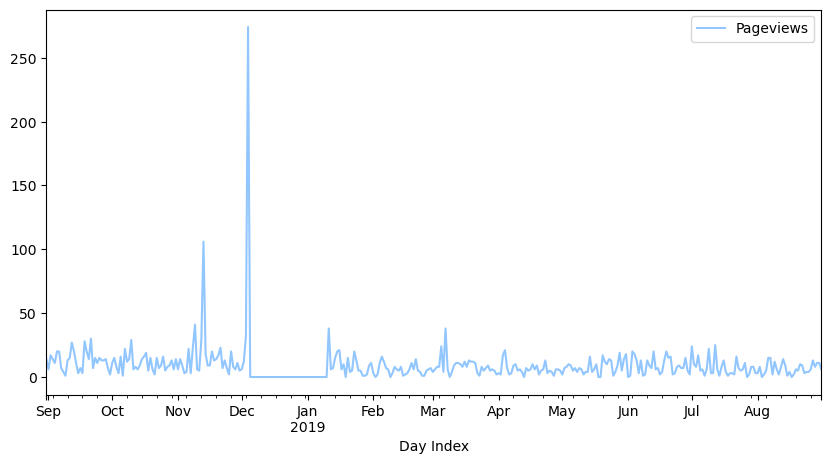

In [255]:
ga_page_traffic_data.plot(figsize=(10,5))

### Fixing Missing Values In The Data

In order to complete the dataset, we can take the average over the year and fill the spaces with that value.

In [256]:
ga_page_traffic_data.describe()

,Pageviews
count,366.000000
mean,9.065574
std,16.412694
min,0.000000
25%,3.000000
50%,6.000000
75%,12.000000
max,274.000000


In [257]:
#Create a variable for Pageview average
average_value = ga_page_traffic_data['Pageviews'].mean()

In [258]:
#Print the average
average_value

9.065573770491802

In [259]:
#Replace any values that are 0 with the average values

ga_page_traffic_data['Pageviews'].replace(0,average_value,inplace=True)

<AxesSubplot:xlabel='Day Index'>

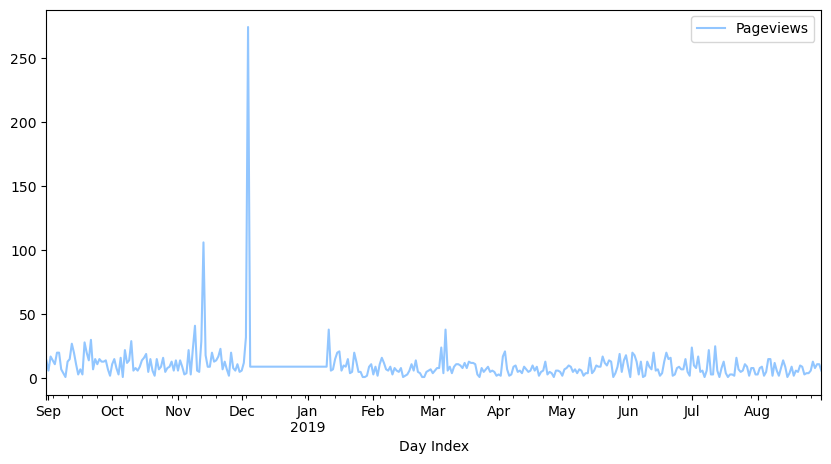

In [260]:
#Plot a chart to check missing values have been replaced
ga_page_traffic_data.plot(figsize=(10,5))

### Resampling Timeseries Data

We can use Pandas Resampling Method with specific time increments and group the data by average to look for trends (Daily, Weekly, Monthly, Quarterly, Yearly) or possible issues within the data.

### Monthly Resampling

In [261]:
#Let's look at the data by Month using the resample method
ga_page_monthly = ga_page_traffic_data.resample('M').mean() #M = month

<AxesSubplot:xlabel='Day Index'>

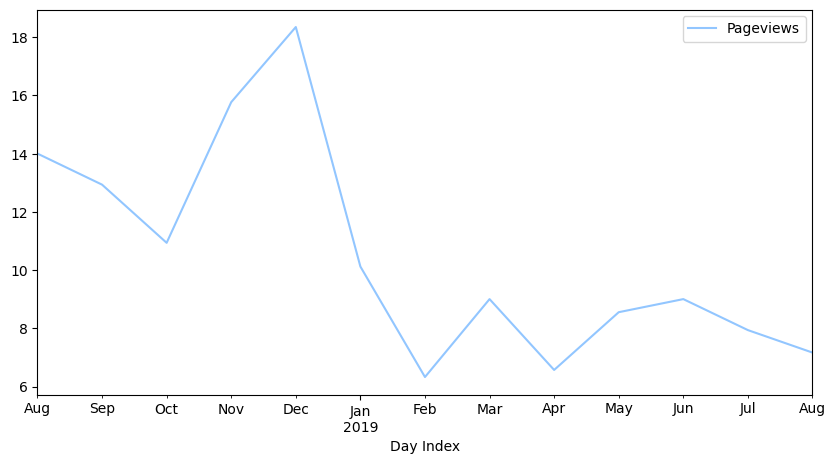

In [262]:
#Plot a monthly line graph
ga_page_monthly.plot(figsize=(10,5))

### Quarterly Resampling

In [263]:
#Plot a quarterly line graph
ga_page_quarterly = ga_page_traffic_data.resample('Q', convention='end').mean() #can change to std, too

<AxesSubplot:xlabel='Day Index'>

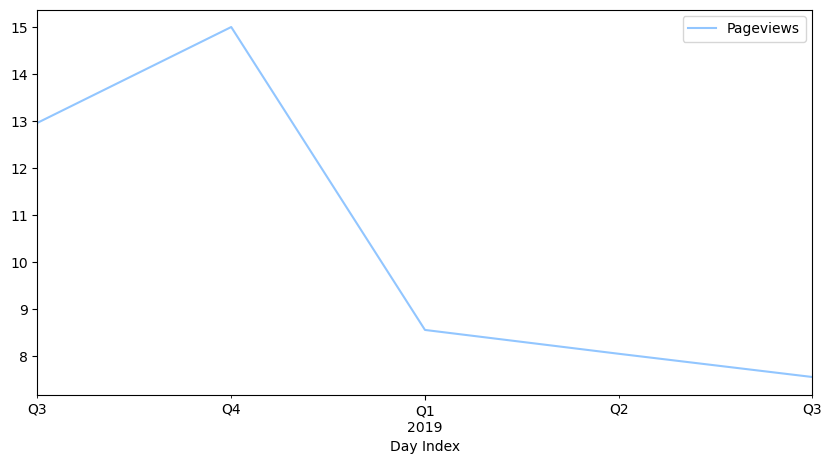

In [264]:
#Plot a quarterly line graph
ga_page_quarterly.plot(figsize=(10,5))

### Resampling And Rolling Average Plots

There are two ways to view an average over time. 

First is the resampling method which taks the average over a set range of 7 days (Monday-Sunday)

The other is a rolling average which calculates the average in a rolling 7 day window
EXAMPLE:start on first date to seventh day, take a sample there
start on second day to eight day, take a sample there
start third to ninth day, take a sample there

Then you can make your calculations
The primary difference is that resampling does not overlap on dates, rolling does. 


This will give us a more accurate account of the average for a period than resampling will. Both are useful but it's situation dependent.

### Calculating The CPC (Cost Per Click) Weekly Average

In [265]:
ppc_data.head()

,Unnamed: 0,Ad group,Avg. CPC,CTR,Campaign,Clicks,Conv. rate,Conversions,Cost,Cost / conv.,Final URL,Impr.,Keyword,Keyword status,Max. CPC,Mobile final URL,Status
Day,,,,,,,,,,,,,,,,,
2018-08-31,0,miratrix_ppc_adgroup,2.490563,16.894144,miratrix_ppc,75,0.225225,1,1105.809783,1105.809783,Text,7501,keyword,Active,2.6,Text,Active
2018-09-01,1,miratrix_ppc_adgroup,2.472161,5.976134,miratrix_ppc,17,1.193317,5,1035.835572,207.167114,Text,2504,keyword,Active,2.6,Text,Active
2018-09-02,2,miratrix_ppc_adgroup,2.508561,6.824919,miratrix_ppc,3,0.107411,1,2335.470042,2335.470042,Text,6354,keyword,Active,2.6,Text,Active
2018-09-03,3,miratrix_ppc_adgroup,2.548919,8.058366,miratrix_ppc,99,2.723735,7,655.072102,93.581729,Text,2071,keyword,Active,2.6,Text,Active
2018-09-04,4,miratrix_ppc_adgroup,2.414868,6.884937,miratrix_ppc,93,1.464435,7,1154.306794,164.900971,Text,3291,keyword,Active,2.6,Text,Active


<AxesSubplot:xlabel='Day'>

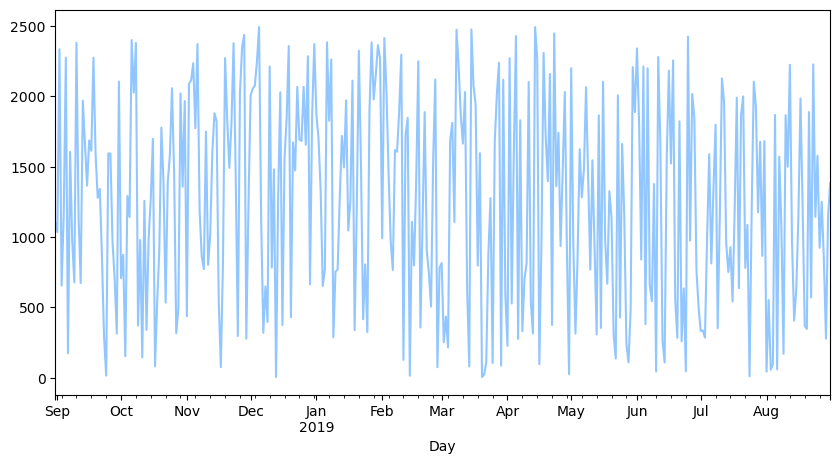

In [266]:
#Lets look at the cost data from a ppc dataset
ppc_data['Cost'].plot(figsize=(10,5))

### Weekly resampling

In [267]:
#Lets resample that data by week and take the average
ppc_weekly = ppc_data['Cost'].resample('W').mean() #W=weekly mean
ppc_weekly.head() #shows weekly increments by mean

Day
2018-09-02    1492.371799
2018-09-09    1073.762622
2018-09-16    1554.423832
2018-09-23    1322.445411
2018-09-30    1041.005947
Freq: W-SUN, Name: Cost, dtype: float64

<AxesSubplot:xlabel='Day'>

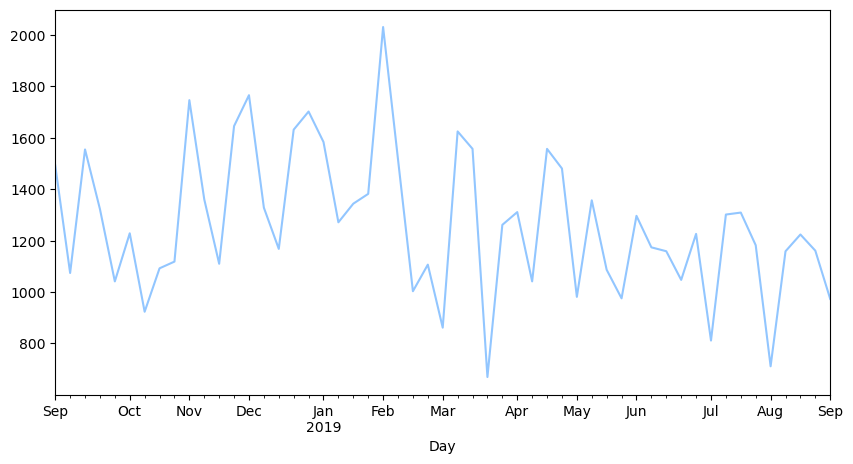

In [268]:
ppc_weekly.plot(figsize=(10,5)) #trending downwards

### Rolling Average

In [269]:
ppc_rolling_7d = ppc_data['Cost'].rolling(window=7, #set a rolling window of x days
                                         center=True #label each window at its midpoint
                                         ).mean()
ppc_rolling_7d.head(10)

#chart is different because it samples at the midpoint each day

Day
2018-08-31            NaN
2018-09-01            NaN
2018-09-02            NaN
2018-09-03    1248.123595
2018-09-04    1319.591703
2018-09-05    1310.633560
2018-09-06    1073.762622
2018-09-07    1320.345163
2018-09-08    1317.992852
2018-09-09    1089.016399
Name: Cost, dtype: float64

<AxesSubplot:xlabel='Day'>

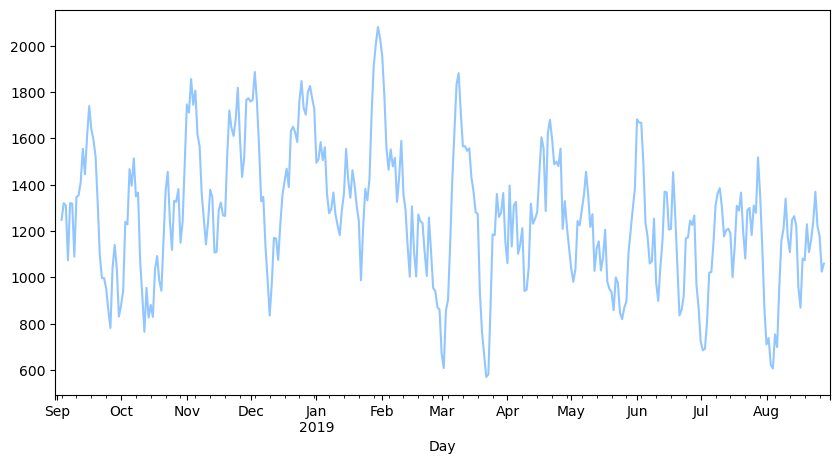

In [270]:
ppc_rolling_7d.plot(figsize=(10,5))

### Plot Weekly Pay Per Click (PPC) Cost Per Click (CPC) Comparison

Here we will plot three different CPC data points (Daily, Resampled and Rolling Weekly) then overlay and compare the output. This will allow us to see different trends and figure out which graph we can use moving forward to optimize our campaigns

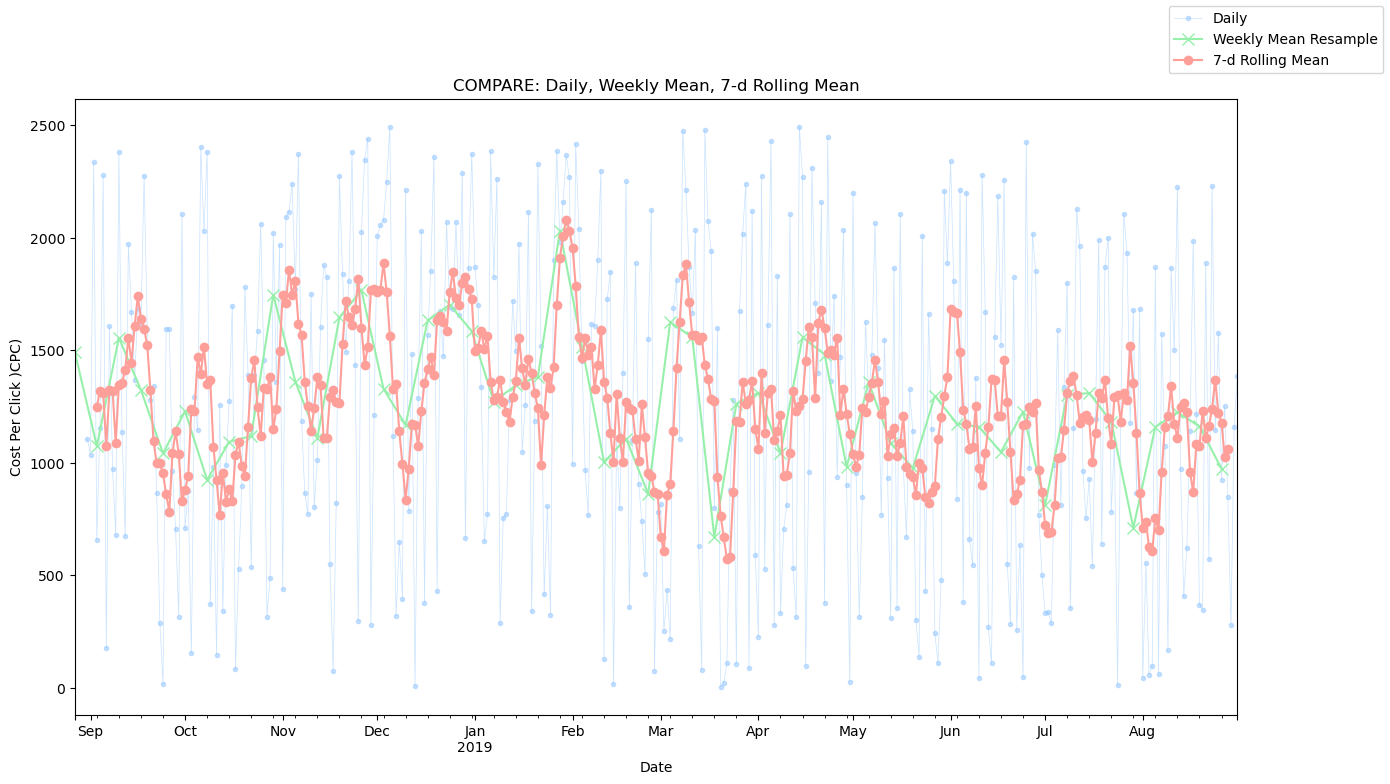

In [271]:
fig = plt.figure(figsize=(10,5)) #Create matplotlib figure (10, wide, 5 high)

ax = fig.add_subplot(111) #Create matplotlib axes (rows=w, columns=1, position=1, which means give me one plot)

figsize = (15,8)

ppc_data['Cost'].plot(figsize=figsize,
                     alpha=.5, #makes this marker slightly transparent
                     marker='.',
                     linestyle='-',
                     linewidth=0.5,
                     label='Daily')

ppc_weekly.plot(figsize=figsize,
               marker='x',
               markersize=8,
               linestyle='-',
                label='Weekly Mean Resample'
               )

ppc_rolling_7d.plot(figsize=figsize,
                   marker='o',
                   linestyle='-',
                   label='7-d Rolling Mean')

ax.set_xlabel('Date') #name of the x axis
ax.set_ylabel('Cost Per Click )CPC)') #name of the y axis

#Global Plot Settings
plt.title('COMPARE: Daily, Weekly Mean, 7-d Rolling Mean') #set the chart name
fig.legend() #set the legend

#display the charts
plt.show()


Result: Daily and Weekly averages are tighter together whereas the 7d rolling mean is a bit more choppy

### Adding Dynamic Annotations

We want to make as much resuseable code as possible and we want to have very clear reports that anyone can read. In marketing we regularly want to look for the highest and lowest Cost Per Click (CPC). Whenever we run this code on a new ppc dataset it will automatically highlight what the max and min CPC is. This is especially useful for others on the team who may not know how to read these charts as well as other analysts.

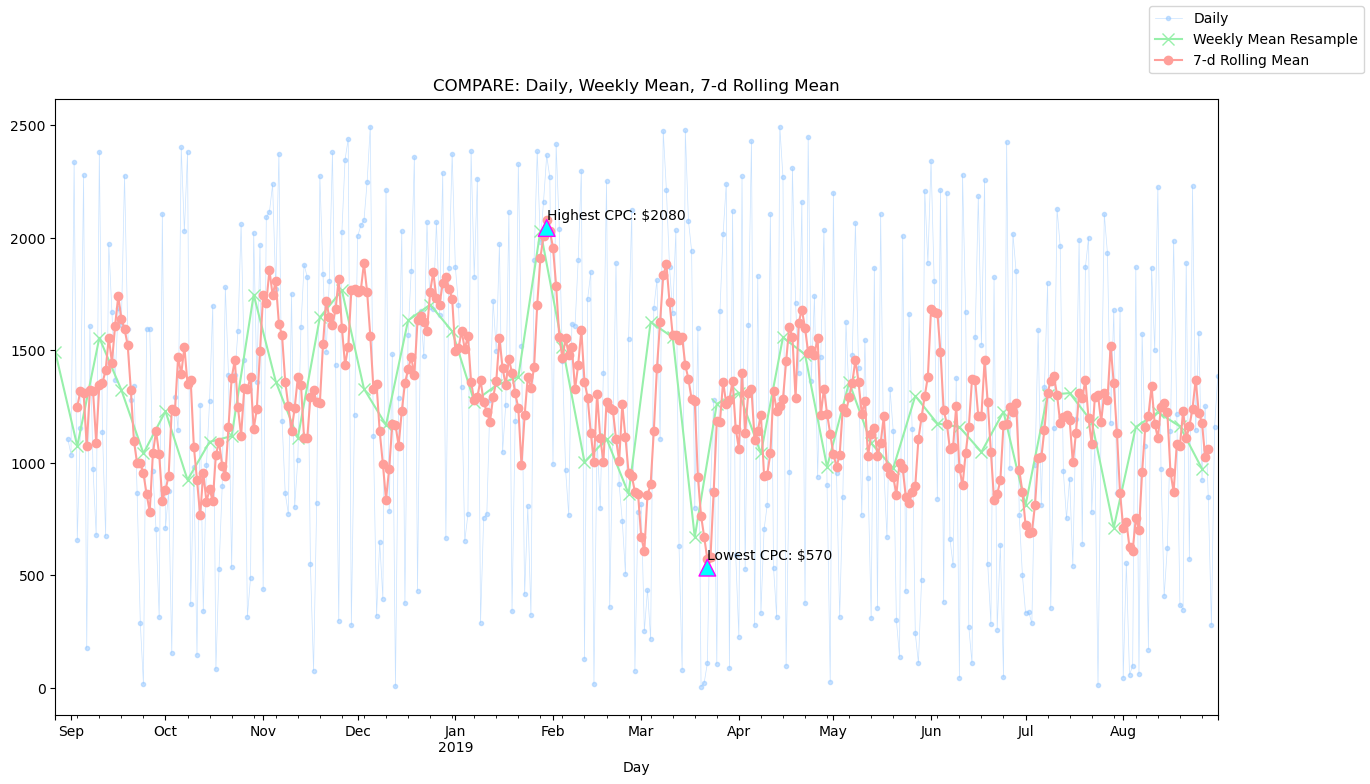

In [272]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(111)

figsize=(15,8)

ppc_data['Cost'].plot(figsize=figsize,
                     alpha=.5,
                     marker='.',
                     linestyle='-',
                     linewidth=0.5,
                     label='Daily')

ppc_weekly.plot(figsize=figsize,
               marker='x',
               markersize=8,
               linestyle='-',
               label='Weekly Mean Resample')

ppc_rolling_7d.plot(figsize=figsize,
                   marker='o',
                   linestyle='-',
                   label='7-d Rolling Mean')

max_value = ppc_rolling_7d.max() #looking for the max value in the dataset
max_value_index=ppc_rolling_7d.idxmax() #looking for the index for the max value

min_value = ppc_rolling_7d.min() #looking for the min value in the dataset
min_value_index=ppc_rolling_7d.idxmin() #looking for the index for the min value


#Create dynamic annotations for max values. Applies to subplot above (subplot 111)
ax.annotate('Highest CPC: ${}'.format(round(max_value)), #pass the string that we would like to present as a text
            #.format allows you to inject numbers or other dynamic text without you having to add it yourself
            #so we are adding the rounded max value into this position
           xy=(max_value_index,max_value), #will place the max in the correct location
           xytext=(max_value_index,max_value),
           arrowprops=dict(facecolor='cyan', #color
                          shrink=0.05, #length of arrow
                          lw=1, #line width
                          ec='magenta',# border color (arrow)
                          zorder=1)) #layering order of annotation - will place in front of chart not behind

#Create dynamic annotations for min values
ax.annotate('Lowest CPC: ${}'.format(round(min_value)),
           xy=(min_value_index,min_value),
           xytext=(min_value_index,min_value),
           arrowprops=dict(facecolor='cyan', #color
                          shrink=0.0, #length of arrow
                          lw=1, #line width
                          ec='magenta', #border color
                          zorder=1)) #layers annotation

#Global Plot Settings
plt.title('COMPARE: Daily, Weekly Mean, 7-d Rolling Mean') #set chart name
fig.legend() #set the legend

#Display the chart
plt.show()


### Calculating And Creating New Metrics

Calculations and creating new metrics in python is very simple and it can open up a whole world of benchmarks and metrics. In this notebook we'll look at various ways of creating and calculating metrics.

In [273]:
ga_gsc_data = pd.read_csv('data/other_data/ga_gsc_data.csv')

In [274]:
ga_gsc_data.head()

,Unnamed: 0,Page,Clicks,Impressions,CTR,Position,Avg. Time on Page,Bounce Rate,Exit,Pageviews,Unique Pageviews
0,0,https://miratrix.co.uk/,371,100673,0.37%,42.59,0 days 00:01:43.666666666,47.296667,54.286667,1396,1095
1,1,https://miratrix.co.uk/app-marketing-agency/,80,30824,0.26%,26.84,0 days 00:01:45.333333333,64.436667,60.913333,210,181
2,2,https://miratrix.co.uk/mobile-app-competitor-a...,16,1458,1.1%,30.64,0 days 00:04:06,53.335000,89.475000,30,26
3,3,https://miratrix.co.uk/blippar-the-message-isn...,11,517,2.13%,36.05,0 days 00:00:22.333333333,58.170000,78.333333,27,21
4,4,https://miratrix.co.uk/author/nduddy/,10,140,7.14%,5.61,0 days 00:02:52,22.223333,38.890000,15,13


In [275]:
ga_gsc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         193 non-null    int64  
 1   Page               193 non-null    object 
 2   Clicks             193 non-null    int64  
 3   Impressions        193 non-null    int64  
 4   CTR                193 non-null    object 
 5   Position           193 non-null    float64
 6   Avg. Time on Page  193 non-null    object 
 7   Bounce Rate        193 non-null    float64
 8   Exit               193 non-null    float64
 9   Pageviews          193 non-null    int64  
 10  Unique Pageviews   193 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 16.7+ KB


Observation: 3 objects appear which we shouldn't have since the Page is really the only object. So we want to change CTR (special character %) and Avg Time on Page (0 days).

Recreate CTR by recalculating it from clicks and impressions 

### Calculating Metrics In Python

In this section we'll recalculate the CTR field and replace the current object with a float. We will also create two new metrics from the current data we have.

In [276]:
ga_gsc_data = pd.read_csv('data/other_data/ga_gsc_data.csv')

#Calculating CTR and replace the CTR column
ga_gsc_data.CTR = (ga_gsc_data.Clicks.div(ga_gsc_data.Impressions)*100).round(2) #we only want clicks rounded to 2

In [277]:
ga_gsc_data.CTR.head()

0    0.37
1    0.26
2    1.10
3    2.13
4    7.14
Name: CTR, dtype: float64

Clicks is no longer an object but is now a float

From the bounce percentage lets calculate the interger value for number of visitors that bounced. We can use this to create another CTR metric which will show us how many total visitors are clicking through

In [278]:
#Calculate the number of bounces
ga_gsc_data['num_bounces']=(ga_gsc_data['Clicks'] - (ga_gsc_data.Exit.div(100).multiply
                                                     (ga_gsc_data['Clicks']))).astype(int)

In [279]:
ga_gsc_data['num_bounces'].head()

0    169
1     31
2      1
3      2
4      6
Name: num_bounces, dtype: int64

In [280]:
ga_gsc_data.head() #added onto the end

,Unnamed: 0,Page,Clicks,Impressions,CTR,Position,Avg. Time on Page,Bounce Rate,Exit,Pageviews,Unique Pageviews,num_bounces
0,0,https://miratrix.co.uk/,371,100673,0.37,42.59,0 days 00:01:43.666666666,47.296667,54.286667,1396,1095,169
1,1,https://miratrix.co.uk/app-marketing-agency/,80,30824,0.26,26.84,0 days 00:01:45.333333333,64.436667,60.913333,210,181,31
2,2,https://miratrix.co.uk/mobile-app-competitor-a...,16,1458,1.10,30.64,0 days 00:04:06,53.335000,89.475000,30,26,1
3,3,https://miratrix.co.uk/blippar-the-message-isn...,11,517,2.13,36.05,0 days 00:00:22.333333333,58.170000,78.333333,27,21,2
4,4,https://miratrix.co.uk/author/nduddy/,10,140,7.14,5.61,0 days 00:02:52,22.223333,38.890000,15,13,6


In [281]:
ga_gsc_data.insert(4,#position
                  'CTR true visits', #name of the column
                  (ga_gsc_data.num_bounces.div(ga_gsc_data.Impressions)*100).round(2) #value
                  )

In [282]:
ga_gsc_data['CTR true visits'].head()

0    0.17
1    0.10
2    0.07
3    0.39
4    4.29
Name: CTR true visits, dtype: float64

In [283]:
ga_gsc_data.head()

,Unnamed: 0,Page,Clicks,Impressions,CTR true visits,CTR,Position,Avg. Time on Page,Bounce Rate,Exit,Pageviews,Unique Pageviews,num_bounces
0,0,https://miratrix.co.uk/,371,100673,0.17,0.37,42.59,0 days 00:01:43.666666666,47.296667,54.286667,1396,1095,169
1,1,https://miratrix.co.uk/app-marketing-agency/,80,30824,0.10,0.26,26.84,0 days 00:01:45.333333333,64.436667,60.913333,210,181,31
2,2,https://miratrix.co.uk/mobile-app-competitor-a...,16,1458,0.07,1.10,30.64,0 days 00:04:06,53.335000,89.475000,30,26,1
3,3,https://miratrix.co.uk/blippar-the-message-isn...,11,517,0.39,2.13,36.05,0 days 00:00:22.333333333,58.170000,78.333333,27,21,2
4,4,https://miratrix.co.uk/author/nduddy/,10,140,4.29,7.14,5.61,0 days 00:02:52,22.223333,38.890000,15,13,6


### Filtering Data

We all need to filter data regularly, it's a daily task. Filtering data in pandas is simple as long as we remember the correct operator to use 

e.g >= (equal to or grater than) or <= (equal to or less than)

In [284]:
#Filter the data by pages that have received 100 or more clicks
ga_gsc_data[ga_gsc_data['Clicks']>=100]

,Unnamed: 0,Page,Clicks,Impressions,CTR true visits,CTR,Position,Avg. Time on Page,Bounce Rate,Exit,Pageviews,Unique Pageviews,num_bounces
0,0,https://miratrix.co.uk/,371,100673,0.17,0.37,42.59,0 days 00:01:43.666666666,47.296667,54.286667,1396,1095,169


In [285]:
#Filter the data by pages that have received 100 or more clicks with a Position under 10
ga_gsc_data[(ga_gsc_data['Position'] <=10) & (ga_gsc_data['Impressions'] >=100)]

,Unnamed: 0,Page,Clicks,Impressions,CTR true visits,CTR,Position,Avg. Time on Page,Bounce Rate,Exit,Pageviews,Unique Pageviews,num_bounces
4,4,https://miratrix.co.uk/author/nduddy/,10,140,4.29,7.14,5.61,0 days 00:02:52,22.223333,38.89,15,13,6
14,14,https://miratrix.co.uk/miratrix-23-golden-squa...,3,227,0.00,1.32,7.59,0 days 00:00:00,0.000000,100.00,4,4,0
34,36,https://miratrix.co.uk/droidcon-not-just-for-d...,1,166,0.00,0.60,8.00,0 days 00:00:00,0.000000,100.00,1,1,0


In [286]:
#To make the above code reuseable, we'll give it a name

filter1 = ga_gsc_data[(ga_gsc_data['Position'] <=10) & (ga_gsc_data['Impressions'] >=100)]

In [287]:
filter1

,Unnamed: 0,Page,Clicks,Impressions,CTR true visits,CTR,Position,Avg. Time on Page,Bounce Rate,Exit,Pageviews,Unique Pageviews,num_bounces
4,4,https://miratrix.co.uk/author/nduddy/,10,140,4.29,7.14,5.61,0 days 00:02:52,22.223333,38.89,15,13,6
14,14,https://miratrix.co.uk/miratrix-23-golden-squa...,3,227,0.00,1.32,7.59,0 days 00:00:00,0.000000,100.00,4,4,0
34,36,https://miratrix.co.uk/droidcon-not-just-for-d...,1,166,0.00,0.60,8.00,0 days 00:00:00,0.000000,100.00,1,1,0


In [288]:
#Filter and sort your data (in descending order)
ga_gsc_data[ga_gsc_data['Impressions'] >=1000].sort_values(by="CTR true visits", ascending=False)

,Unnamed: 0,Page,Clicks,Impressions,CTR true visits,CTR,Position,Avg. Time on Page,Bounce Rate,Exit,Pageviews,Unique Pageviews,num_bounces
0,0,https://miratrix.co.uk/,371,100673,0.17,0.37,42.59,0 days 00:01:43.666666666,47.296667,54.286667,1396,1095,169
1,1,https://miratrix.co.uk/app-marketing-agency/,80,30824,0.10,0.26,26.84,0 days 00:01:45.333333333,64.436667,60.913333,210,181,31
2,2,https://miratrix.co.uk/mobile-app-competitor-a...,16,1458,0.07,1.10,30.64,0 days 00:04:06,53.335000,89.475000,30,26,1
8,8,https://miratrix.co.uk/app-store-optimization-...,5,4177,0.02,0.12,70.02,0 days 00:01:31.666666666,61.906667,60.256667,198,160,1
82,93,https://miratrix.co.uk/seo-agency-london/,0,1496,0.00,0.00,215.61,0 days 00:00:32.500000,100.000000,66.665000,4,4,0


### Create Helpful Alerts

In this section we're going to build! All of the data cleaned and processed. Now it's time to start making it work for us by putting together a very simple alert function that we can customize.

In [289]:
ga_page_traffic_data = pd.read_csv('data/ga_data/ga_pages.csv',
                                  skiprows=386, nrows=366, #skip 386 rows and only use 366 after
                                  usecols=['Day Index', 'Pageviews'], #use the columns Day Index and Pageviews
                                  parse_dates=['Day Index'], #parse column Day Index as date time
                                  index_col='Day Index') #set Day as index

In [290]:
ga_page_traffic_data.head()

,Pageviews
Day Index,
2018-08-31,14
2018-09-01,6
2018-09-02,17
2018-09-03,14
2018-09-04,11


In [291]:
ga_page_traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2018-08-31 to 2019-08-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Pageviews  366 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


### Creating An Alert For A Loop

We can create an alert that signals whether a number is positive, negative or has no change.

In [292]:
#Create a variable called num and assign it to an integer
num=-5

In [293]:
#Create a for loop for the beginning of the alerts

#Write a statement that prints if the number is up, down or no change
if num > 0: #anything greater than 0 is up
    print("it's UP!")
    
elif num == 0: #if the number is equal to 0 then no change
    print("No Change")
        
else: #everything else is down
    print("It's DOWN!")

It's DOWN!


### Filter By Date Range And Get The Difference

We're going to create a way of filtering our data by date range. To do this we need a start and end date.

In [294]:
start = '2018-08-31'
end = '2018-09-30'

In [295]:
#Create a mask that will select two dates. A mask will return a boolean (True/False) array. Mask=Filter
mask = ((ga_page_traffic_data.index == start) | (ga_page_traffic_data.index == end))
mask[:30]

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [296]:
#Apply the mask to the dataframe
ga_page_traffic_data[mask]

,Pageviews
Day Index,
2018-08-31,14
2018-09-30,2


In [297]:
#Now we want to calculate the difference between the two rows and select the number
diff = ga_page_traffic_data[mask].diff().max()[0]

In [298]:
diff

-12.0

In [299]:
#if we just use the calculation from above and take out max, we get -12. We're using max to get the max number and
#don't get the NaN value but then we can't use that -12 anywhere else so we're using MAX so we get the .0 at
#the end and we can use that number later on
ga_page_traffic_data[mask].diff()

,Pageviews
Day Index,
2018-08-31,NaN
2018-09-30,-12.0


### Create An Alert!

Now that we can select data and check the difference between two rows, it's possible to create an alert that will get us the data we need if something has gone wrong.

In [312]:
start = '2018-08-31'
end = '2018-09-30'

def alerts(df, start, end): #df = dataframe
    mask = ((df.index == start) | (df.index == end)) #Create a dataframe with start/end date
    diff = df[mask].diff().max()[0] #apply mask to dataframe, work out difference, select the max diff and pool
    chart = df[mask] #create a df with the mask applied with the function made above (diff)
if diff > 0:
            print("Traffic is up by {}".format(diff)) #print if traffic (diff) is above 0
             
elif diff == 0:
             print("No Change") #print if the traffic (diff) is unchanged
             
else:
             print("Traffic is down by {}".format(diff)) #print if the traffic (diff) is below 0)import matplotlib.pyplot as plt 

Traffic is down by -12.0
